## Library

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

from copy import copy
from scipy import stats
from pprint import pprint

exec(open('library.py').read())
print('Loaded')

Loaded
Loaded


## Variables (customize these)

In [2]:
# Customize these!!!

# Global variables - probably don't want to change these but you could.
RUNS = 10000                                      # Number of runs to do (default 1000)
CURRENT_YEAR = 2022                               # What year to start the run on? (default: 2022)
MAX_YEAR = 2222                                   # What year to end the run on? (default: 2100)
USE_NUMBERS = 'Wildeford'                         # Which variable set (see below) to use?
GRAPH_P = 50                                      # What percentile to graph on the graphs below? (default: 50)


# Variable sets - definitely change these!
if USE_NUMBERS == 'Cotra2020':
    initial_gdp = 21 * trillion                    # GDP in `CURRENT_YEAR` of country that will develop TAI (default: 21.3 trillion)
    
    tai_flop_size = distributed_lognorm([[25,35],  # Lifetime anchor
                                         [26.5,40.7],  # Small NN anchor
                                         [28.4,39.5],  # Genome anchor
                                         [28.1,43.5],  # Medium NN anchor
                                         [30.3,46.5],  # Long NN anchor
                                         [34.3,46.9],  # Evolution anchor
                                         [60,70]], # No path anchor
                                        [0.052,0.21,0.11,0.312,0.155,0.1,0.07]) # Relative weights
    # 90% CI, it takes 10^X FLOPs to run a transformative AI at inference.
    # Note: A petaflop/s-day (pfs-day) consists of performing 10^15 neural net operations per second for one day,
    # or a total of about 10^20 operations
    
    algo_doubling_rate_max = norm(3.5, 3.5)        # 90% CI, algorithms get twice as efficient every X years (maximum)
    algo_doubling_rate_min = norm(2, 2)            # 90% CI, algorithms get twice as efficient every X years (minimum)
    min_reduction = norm(2, 2)                     # 90% CI, the minimum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    max_reduction = norm(5, 5)                     # 90% CI, the maximum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    initial_flops_per_dollar = norm(17, 17)        # 90% CI, as of today, we can buy 10^X FLOPs per $
    flops_halving_rate = lognorm(2.5, 2.5)         # 90% CI, the cost of FLOPs per $ halves every X years
    max_flops_per_dollar = norm(24, 24)            # 90% CI, the cheapest FLOPs will get is 10^X FLOPs per $
    initial_pay = norm(8.7, 8.7)                       # 90% CI, as of today the maximum we would pay for TAI is $10^X
    gdp_growth = norm(1.03, 1.03)                  # 90% CI, GDP will increase by a factor of X each year
    max_gdp_frac = norm(0.01, 0.01)                # 90% CI, the maximum % of GDP that would be spent on TAI is $10^X
    p_willingness_ramp = 0                         # What is the probability that, if we were close to TAI, we would suddenly ramp up spending?
    willingness_ramp = norm(1, 1)                  # 90% CI, if we are X% of the spend needed to acheive TAI, we will instantly jump to TAI
    willingness_spend_horizon = 1                  # How many years are we willing to consider spending to make TAI?
    spend_doubling_time = norm(2.5, 2.5)           # 90% CI, our willingness to spend on TAI doubles every X years
    initial_chance_of_nonscaling_issue = 0         # What is the chance there will be a non-scaling issue if TAI is feasible in `CURRENT_YEAR`?
    final_chance_of_nonscaling_issue = 0           # What is the chance there will be a non-scaling issue if TAI is feasible only by `nonscaling_issue_bottom_year` (see below)?
    nonscaling_issue_bottom_year = 0               # What year will will the chance of a non-scaling issue bottom out at (reaching `final_chance_of_nonscaling_issue`)?
    nonscaling_delay = norm(0, 0)                  # 90% CI, conditional on a delay, how many additional years will TAI be delayed due to issues unrelated to scaling to an adequate number of FLOPs (e.g., collecting the relevant training data)?

elif USE_NUMBERS == 'Cotra2022':
    initial_gdp = 21 * trillion
    tai_flop_size = distributed_lognorm([[25,35],  # Lifetime anchor
                                         [25.7,37.6],  # GPT-N anchor
                                         [26.5,40.7],  # Small NN anchor
                                         [28.4,39.5],  # Genome anchor
                                         [28.1,43.5],  # Medium NN anchor
                                         [30.3,46.5],  # Long NN anchor
                                         [34.3,46.9],  # Evolution anchor
                                         [60,70]], # No path anchor
                                        [0.1,0.2,0.3,0.1,0.12,0.1,0.05,0.03]) # Relative weights
    algo_doubling_rate_max = norm(3.5, 3.5)
    algo_doubling_rate_min = norm(2, 2)
    min_reduction = norm(2, 2)
    max_reduction = norm(5, 5)
    initial_flops_per_dollar = norm(18, 18)
    flops_halving_rate = norm(2.6, 3)
    max_flops_per_dollar = norm(24, 24)
    initial_pay = norm(8.7, 8.7)
    gdp_growth = norm(1.03, 1.03)
    max_gdp_frac = norm(0.01, 0.01)
    p_willingness_ramp = 0
    willingness_ramp = norm(1, 1)
    willingness_spend_horizon = 1
    spend_doubling_time = norm(2.5, 2.5)
    initial_chance_of_nonscaling_issue = 0
    final_chance_of_nonscaling_issue = 0
    nonscaling_issue_bottom_year = 0
    nonscaling_delay = norm(0, 0)
    
elif USE_NUMBERS == 'Wildeford':
    initial_gdp = 21 * trillion
    tai_flop_size = log_tdist(27, 42, 5)
    min_reduction = norm(1, 3)
    max_reduction = norm(4, 8)
    algo_doubling_rate_max = norm(1.5, 4.5)
    algo_doubling_rate_min = norm_lclip(1, 3)
    initial_flops_per_dollar = lognorm(17.5, 18.5)
    flops_halving_rate = lognorm(2, 5)
    max_flops_per_dollar = norm(22, 27)
    initial_pay = distributed_lognorm([[6,7],[7,8]],[0.9,0.1])
    gdp_growth = norm(1.015, 1.035)
    max_gdp_frac = lognorm_lclip(0.00006, 0.002)
    p_willingness_ramp = 0.1
    willingness_ramp = norm(0.3, 0.9)
    willingness_spend_horizon = 10
    spend_doubling_time = lognorm_lclip(0.5, 2.75)
    initial_chance_of_nonscaling_issue = 0.9
    final_chance_of_nonscaling_issue = 0.1
    nonscaling_issue_bottom_year = 2050
    nonscaling_delay = lognorm(2, 20)
    
elif USE_NUMBERS == 'Kokotajlo':
    initial_gdp = 21 * trillion
    tai_flop_size = lognorm(24, 39)
    algo_doubling_rate_max = norm(1, 1)
    algo_doubling_rate_min = norm(1, 1)
    min_reduction = norm(2, 2)
    max_reduction = norm(5, 5)
    initial_flops_per_dollar = norm(18, 18)
    flops_halving_rate = norm(2.6, 3)
    max_flops_per_dollar = norm(24, 24)
    initial_pay = norm(8.7, 8.7)
    gdp_growth = norm(1.03, 1.03)
    max_gdp_frac = norm(0.01, 0.01)
    p_willingness_ramp = 1
    willingness_ramp = norm(0.1, 0.1)
    willingness_spend_horizon = 1
    spend_doubling_time = norm(2.5, 2.5)
    initial_chance_of_nonscaling_issue = 0
    final_chance_of_nonscaling_issue = 0
    nonscaling_issue_bottom_year = 0
    nonscaling_delay = norm(0, 0)
    
else:
    raise ValueError


# These equations define how variables change over time or in relationship to other variables.
def gdp(initial_gdp, gdp_growth, year):
    return initial_gdp * (gdp_growth ** year)

def willingness_to_pay(initial_gdp, gdp_growth, initial_pay, spend_doubling_time, max_gdp_frac, year):
    gdp_ = gdp(initial_gdp=initial_gdp, gdp_growth=gdp_growth, year=year)
    x = (np.log(2) / spend_doubling_time) * year
    if x < 700:
        y = math.log10(initial_pay) + math.log10(math.exp(x)) - math.log10(1 + initial_pay / (gdp_ * max_gdp_frac) * math.exp(x))
        if y > 300:
            y = int(y) # Handle overflow errors
        return 10 ** y
    else: # Handle math.exp and math.log10 overflow errors
        return 10 ** int(math.log10(initial_pay) + (year/spend_doubling_time)/3.3)

def possible_algo_reduction_fn(min_reduction, max_reduction, tai_flop_size):
    if max_reduction < min_reduction:
        max_reduction = min_reduction
    if min_reduction > max_reduction:
        min_reduction = max_reduction
    return min(max(min_reduction + round((tai_flop_size - 32) / 4), min_reduction), max_reduction)

def algo_halving_fn(min_speed, max_speed, tai_flop_size):
    if max_speed < min_speed:
        max_speed = min_speed
    if min_speed > max_speed:
        min_speed = max_speed
    return min(max(max_speed - (round((tai_flop_size - 29) / 2) / 2), min_speed), max_speed)

def flops_needed(initial_flops, possible_reduction, doubling_rate, year):
    x = (np.log(2) / doubling_rate) * year
    if x < 700:
        y = (math.log10(initial_flops) - max(math.log10(math.exp(x)) - math.log10(1 + (1/possible_reduction) * math.exp(x)), 0))
        if y > 300:
            y = int(y) # Handle overflow errors        
        return 10 ** y
    else: # Handle math.exp and math.log10 overflow errors
        return 10 ** int(math.log10(initial_flops) - (1/possible_reduction))

def flops_per_dollar(initial_flops_per_dollar, max_flops_per_dollar, halving_rate, year):
    x = (np.log(2) / halving_rate) * year
    if x < 700:
        y = (math.log10(initial_flops_per_dollar) + math.log10(math.exp(x)) - math.log10(1 + initial_flops_per_dollar / max_flops_per_dollar * math.exp(x)))
        if y > 300:
            y = int(y) # Handle overflow errors                
        return 10 ** y
    else: # Handle math.exp and math.log10 overflow errors
        return 10 ** int(math.log10(initial_flops_per_dollar) + (year/halving_rate)/3.3)

def cost_of_tai(initial_flops, possible_reduction, algo_doubling_rate, initial_flops_per_dollar, max_flops_per_dollar,
                flops_halving_rate, year):
    return (flops_needed(initial_flops, possible_reduction, algo_doubling_rate, year) /
            flops_per_dollar(initial_flops_per_dollar, max_flops_per_dollar, flops_halving_rate, year))

def flops_at_max(initial_gdp, gdp_growth, initial_pay, spend_doubling_time, max_gdp_frac,
                 initial_flops_per_dollar, max_flops_per_dollar, flops_halving_rate, year):
    return (willingness_to_pay(initial_gdp=initial_gdp,
                               gdp_growth=gdp_growth,
                               initial_pay=initial_pay,
                               spend_doubling_time=spend_doubling_time,
                               max_gdp_frac=0.01,
                               year=year) *
            flops_per_dollar(initial_flops_per_dollar, max_flops_per_dollar, flops_halving_rate, year))

def p_nonscaling_delay(initial_p, final_p, year, max_year):
    initial_p = initial_p - final_p
    p_ = initial_p - (initial_p * ((year - CURRENT_YEAR) / (max_year - CURRENT_YEAR))) + final_p
    return final_p if p_ < final_p else p_

def p_rapid_recursive_self_improvement(flops_needed_for_tai, flops_we_have, base_p, curve_steepness, curve_inflection):
    if flops_we_have > 10 ** 250:
        return base_p  # Handle overflow error
    if flops_needed_for_tai > 10 ** 250:
        ratio = int(flops_we_have) // int(flops_needed_for_tai)
    else:
        ratio = flops_we_have / flops_needed_for_tai 
    return base_p / (1 + math.exp(-curve_steepness * (ratio - curve_inflection)))

    
# ------------- Ignore below here ------------
years = list(range(CURRENT_YEAR, MAX_YEAR))
print('Loaded')


Loaded


{1: 20.817311364918545,
 5: 25.027076060400123,
 10: 27.16278684532825,
 20: 29.534365786328802,
 30: 31.133387281630583,
 40: 32.40665458329286,
 50: 33.61025590062415,
 60: 34.90427054385131,
 70: 36.47907026504609,
 80: 38.48244597876671,
 90: 41.782976102582246,
 95: 45.27592870672943,
 99: 54.957527063516025}


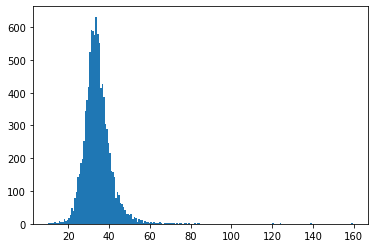

In [3]:
initial_flop_size_s = [sample(tai_flop_size) for s in range(10000)]
initial_flops_p = get_percentiles(initial_flop_size_s)
plt.hist(initial_flop_size_s, bins = 200)
pprint(initial_flops_p)

{1: 24.538876002896934,
 5: 26.66022983707689,
 10: 28.01648464244699,
 20: 29.665541646411214,
 30: 30.99564797569381,
 40: 32.26551142627902,
 50: 33.547857101025,
 60: 34.84197505046617,
 70: 36.32454320427853,
 80: 38.09803312895395,
 90: 40.79185999851712,
 95: 43.04401426763238,
 99: 47.51981065555219}


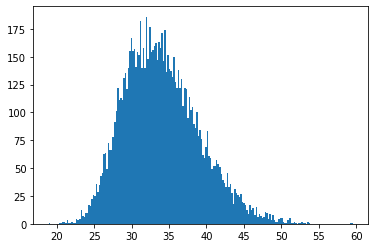

In [4]:
s_ = distributed_lognorm([[25,35],  # Lifetime anchor
                          [25.7,37.6],  # GPT-N anchor
                          [26.5,40.7],  # Small NN anchor
                          [28.4,39.5],  # Genome anchor
                          [28.1,43.5],  # Medium NN anchor
                          [30.3,46.5],  # Long NN anchor
                          [34.3,46.9],  # Evolution anchor
                          [60,70]], # No path anchor
                         [0.05,0.2,0.38,0,0.2,0.12,0.05,0]) # Relative weights
s_ = [sample(s_) for s in range(10000)]
p_ = get_percentiles(s_)
plt.hist(s_, bins = 200)
pprint(p_)

In [5]:
min_reduction_p = get_percentiles([sample(min_reduction) for s in range(1000)], reverse=True)
min_reduction_p

{99: 0.5610018063642896,
 95: 1.0771464497726775,
 90: 1.2843920885102487,
 80: 1.4927447863401104,
 70: 1.6854441146227084,
 60: 1.834693710554768,
 50: 2.0005849283576396,
 40: 2.1725420563526705,
 30: 2.339046642441146,
 20: 2.529444532983163,
 10: 2.7907151469140317,
 5: 2.973371499411326,
 1: 3.389219002474402}

In [6]:
max_reduction_p = get_percentiles([sample(max_reduction) for s in range(1000)], reverse=True)
max_reduction_p

{99: 3.1506061015455074,
 95: 4.106073443332753,
 90: 4.470160195729199,
 80: 5.0111812724613,
 70: 5.459127805964377,
 60: 5.797433037166336,
 50: 6.115405403326089,
 40: 6.451113024832971,
 30: 6.800972000375455,
 20: 7.16321618801812,
 10: 7.667988726262037,
 5: 8.109237213141332,
 1: 8.81430219667988}

In [7]:
algo_doubling_rate_min_p = get_percentiles([sample(algo_doubling_rate_min) for s in range(1000)], reverse=True)
algo_doubling_rate_min_p

{99: 1.0,
 95: 1.0,
 90: 1.2078703316515405,
 80: 1.4917138741372367,
 70: 1.671164517193671,
 60: 1.865183365580943,
 50: 1.9991511974713874,
 40: 2.1585867155309817,
 30: 2.306619731644255,
 20: 2.4847716365773014,
 10: 2.7065938807330787,
 5: 2.995763068019534,
 1: 3.358646307200573}

In [8]:
algo_doubling_rate_max_p = get_percentiles([sample(algo_doubling_rate_max) for s in range(1000)], reverse=True)
algo_doubling_rate_max_p

{99: 0.8324972838486738,
 95: 1.5051413283831656,
 90: 1.8466618930904952,
 80: 2.276984551144692,
 70: 2.5621422856979934,
 60: 2.814502750434107,
 50: 3.072430556900395,
 40: 3.344259566647096,
 30: 3.584641368864361,
 20: 3.8717528410426567,
 10: 4.245923105057626,
 5: 4.6284127388323295,
 1: 5.063868338966122}

In [9]:
initial_flops_per_dollar_p = get_percentiles([sample(initial_flops_per_dollar) for s in range(1000)])
initial_flops_per_dollar_p

{1: 17.33584155620578,
 5: 17.508774126139556,
 10: 17.611584830760762,
 20: 17.738864274068337,
 30: 17.826214139939932,
 40: 17.91787430557538,
 50: 17.988906571556747,
 60: 18.078401301759744,
 70: 18.166122674481453,
 80: 18.26325004596217,
 90: 18.408737588893818,
 95: 18.51660178654566,
 99: 18.724668059981067}

In [10]:
flops_halving_rate_p = get_percentiles([sample(flops_halving_rate) for s in range(1000)], reverse=True)
flops_halving_rate_p

{99: 1.6789563737144755,
 95: 1.9766601059383895,
 90: 2.2028172926247156,
 80: 2.4750611204385433,
 70: 2.771364696214506,
 60: 2.987205261810604,
 50: 3.211616527243951,
 40: 3.4350329895423872,
 30: 3.705302035306189,
 20: 4.025108561941495,
 10: 4.497859863412829,
 5: 4.900499495530713,
 1: 6.0117564004811985}

In [11]:
max_flops_per_dollar_p = get_percentiles([sample(max_flops_per_dollar) for s in range(1000)])
max_flops_per_dollar_p

{1: 21.07187154846604,
 5: 22.128696386529903,
 10: 22.63822798456898,
 20: 23.328057619639804,
 30: 23.867146451021863,
 40: 24.239584205183885,
 50: 24.583002307586924,
 60: 24.957430219526874,
 70: 25.383251808165426,
 80: 25.882160517626833,
 90: 26.500383525094094,
 95: 27.030911883938803,
 99: 27.861112388677974}

In [12]:
initial_pay_p = get_percentiles([sample(initial_pay) for s in range(1000)])
initial_pay_p

{1: 5.830751224227794,
 5: 6.010287008419371,
 10: 6.119680012360779,
 20: 6.2556207512078155,
 30: 6.348802725888836,
 40: 6.4209876977932145,
 50: 6.503136614189069,
 60: 6.586003240862472,
 70: 6.711757957687846,
 80: 6.861051099817932,
 90: 7.133624751560429,
 95: 7.5056309071345835,
 99: 7.9379268204934466}

In [13]:
gdp_growth_p = get_percentiles([sample(gdp_growth) for s in range(1000)])
gdp_growth_p

{1: 1.0106188270004484,
 5: 1.0150684494636628,
 10: 1.017510259613745,
 20: 1.0200815656216011,
 30: 1.0219306586182952,
 40: 1.0233723079974029,
 50: 1.0250771001922205,
 60: 1.0264073554977404,
 70: 1.0280070630738354,
 80: 1.0296481278221115,
 90: 1.031983241693014,
 95: 1.0344554842559879,
 99: 1.0393508943085243}

In [14]:
max_gdp_frac_p = get_percentiles([sample(max_gdp_frac) for s in range(1000)])
max_gdp_frac_p

{1: 6e-05,
 5: 6e-05,
 10: 8.610808161026746e-05,
 20: 0.00014340992937384735,
 30: 0.0001848648168214914,
 40: 0.00024279974750454058,
 50: 0.0003145382580540532,
 60: 0.00042669346182245345,
 70: 0.0005997479892571573,
 80: 0.0008258702116021964,
 90: 0.0012708142988907844,
 95: 0.0018271912666921071,
 99: 0.004402092593135443}

In [15]:
willingness_ramp_p = get_percentiles([sample(willingness_ramp) for s in range(1000)])
willingness_ramp_p

{1: 0.18521589261699237,
 5: 0.2966521621724365,
 10: 0.36770691297221203,
 20: 0.4482360341045409,
 30: 0.5106973600521421,
 40: 0.5595469022482472,
 50: 0.6067646003980263,
 60: 0.6539536323145884,
 70: 0.7063448509896014,
 80: 0.7567848188468478,
 90: 0.8257420271048138,
 95: 0.882726880703926,
 99: 1.0083272339446894}

In [16]:
spend_doubling_time_p = get_percentiles([sample(spend_doubling_time) for s in range(1000)], reverse=True)
spend_doubling_time_p

{99: 0.5,
 95: 0.5,
 90: 0.5955212082323013,
 80: 0.7659961150020895,
 70: 0.893353676413062,
 60: 1.0481772967737752,
 50: 1.2024237763928336,
 40: 1.3685896017528962,
 30: 1.5590867211519315,
 20: 1.826961468494755,
 10: 2.26193518520537,
 5: 2.7520676556189962,
 1: 3.6808674353195507}

In [17]:
nonscaling_delay_p = get_percentiles([sample(nonscaling_delay) for s in range(1000)], reverse=True)
nonscaling_delay_p

{99: 1.2923807335249355,
 95: 2.12275987910541,
 90: 2.7554229566477813,
 80: 3.536011841195608,
 70: 4.474634200758125,
 60: 5.3589418015213965,
 50: 6.263012657319495,
 40: 7.55319118693528,
 30: 9.08773537075818,
 20: 11.380684686750252,
 10: 15.591069933131072,
 5: 19.559064340191394,
 1: 32.573396374279675}

## GDP Over Time

Text(0, 0.5, 'log GDP')

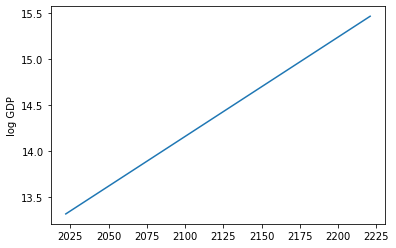

In [18]:
gdp_ = np.array([gdp(initial_gdp=initial_gdp,
                     gdp_growth=gdp_growth_p[GRAPH_P],
                     year=(y - CURRENT_YEAR)) for y in years])
plt.plot(years, np.log10(gdp_))
plt.ylabel('log GDP')

In [19]:
for y in years:
    print('Year: {} - GDP log 2022$USD {} (~{})'.format(y,
                                                        np.round(np.log10(gdp_[y - CURRENT_YEAR]), 1),
                                                        numerize(np.log10(gdp_[y - CURRENT_YEAR]))))
    

Year: 2022 - GDP log 2022$USD 13.3 (~10 trillion)
Year: 2023 - GDP log 2022$USD 13.3 (~10 trillion)
Year: 2024 - GDP log 2022$USD 13.3 (~10 trillion)
Year: 2025 - GDP log 2022$USD 13.4 (~10 trillion)
Year: 2026 - GDP log 2022$USD 13.4 (~10 trillion)
Year: 2027 - GDP log 2022$USD 13.4 (~10 trillion)
Year: 2028 - GDP log 2022$USD 13.4 (~10 trillion)
Year: 2029 - GDP log 2022$USD 13.4 (~10 trillion)
Year: 2030 - GDP log 2022$USD 13.4 (~10 trillion)
Year: 2031 - GDP log 2022$USD 13.4 (~10 trillion)
Year: 2032 - GDP log 2022$USD 13.4 (~10 trillion)
Year: 2033 - GDP log 2022$USD 13.4 (~10 trillion)
Year: 2034 - GDP log 2022$USD 13.5 (~10 trillion)
Year: 2035 - GDP log 2022$USD 13.5 (~10 trillion)
Year: 2036 - GDP log 2022$USD 13.5 (~10 trillion)
Year: 2037 - GDP log 2022$USD 13.5 (~10 trillion)
Year: 2038 - GDP log 2022$USD 13.5 (~10 trillion)
Year: 2039 - GDP log 2022$USD 13.5 (~10 trillion)
Year: 2040 - GDP log 2022$USD 13.5 (~10 trillion)
Year: 2041 - GDP log 2022$USD 13.5 (~10 trillion)


## Willingness to Pay Over Time

-
-
## 20 ##
Year: 2022 - willingness log 2022$USD per year 6.3 (~one million)
Year: 2023 - willingness log 2022$USD per year 6.4 (~one million)
Year: 2024 - willingness log 2022$USD per year 6.6 (~one million)
Year: 2025 - willingness log 2022$USD per year 6.7 (~one million)
Year: 2026 - willingness log 2022$USD per year 6.9 (~one million)
Year: 2027 - willingness log 2022$USD per year 7.1 (~10 million)
Year: 2028 - willingness log 2022$USD per year 7.2 (~10 million)
Year: 2029 - willingness log 2022$USD per year 7.4 (~10 million)
Year: 2030 - willingness log 2022$USD per year 7.6 (~10 million)
Year: 2031 - willingness log 2022$USD per year 7.7 (~10 million)
Year: 2032 - willingness log 2022$USD per year 7.9 (~10 million)
Year: 2033 - willingness log 2022$USD per year 8.1 (~100 million)
Year: 2034 - willingness log 2022$USD per year 8.2 (~100 million)
Year: 2035 - willingness log 2022$USD per year 8.4 (~100 million)
Year: 2036 - willingness log 2022$USD per year 8.5 (~100 million)
Yea

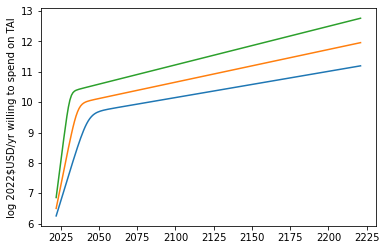

In [20]:
for p in [20, 50, 80]:
    print('-')
    print('-')
    print('## {} ##'.format(p))
    willingness = np.array([willingness_to_pay(initial_gdp=initial_gdp,
                                               gdp_growth=gdp_growth_p[p],
                                               initial_pay=10 ** initial_pay_p[p],
                                               spend_doubling_time=spend_doubling_time_p[p],
                                               max_gdp_frac=max_gdp_frac_p[p],
                                               year=(y - CURRENT_YEAR)) for y in years])
    for y in years:
        print('Year: {} - willingness log 2022$USD per year {} (~{})'.format(y,
                                                                             np.round(np.log10(willingness[y - CURRENT_YEAR]), 1),
                                                                             numerize(np.log10(willingness[y - CURRENT_YEAR]))))


    plt.plot(years, np.log10(willingness))
plt.ylabel('log 2022$USD/yr willing to spend on TAI')
plt.show()


## FLOPs Needed to Make TAI (Given Algorithmic Progress)

Text(0, 0.5, 'log FLOPs needed to make TAI')

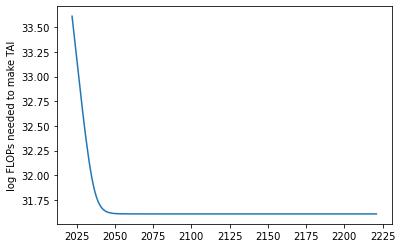

In [21]:
flops_ = np.array([flops_needed(initial_flops=10 ** initial_flops_p[GRAPH_P],
                                doubling_rate=algo_halving_fn(algo_doubling_rate_min_p[GRAPH_P],
                                                              algo_doubling_rate_max_p[GRAPH_P],
                                                              initial_flops_p[GRAPH_P]),
                                possible_reduction=10 ** possible_algo_reduction_fn(min_reduction_p[GRAPH_P], max_reduction_p[GRAPH_P], initial_flops_p[GRAPH_P]),
                                year=(y - CURRENT_YEAR)) for y in years])

plt.plot(years, np.log10(flops_))
plt.ylabel('log FLOPs needed to make TAI')


In [22]:
for y in years:
    print('Year: {} - log FLOPs needed for TAI {} (~{})'.format(y,
                                                                np.round(np.log10(flops_[y - CURRENT_YEAR]), 1),
                                                                numerize(np.log10(flops_[y - CURRENT_YEAR]))))

Year: 2022 - log FLOPs needed for TAI 33.6 (~one decillion)
Year: 2023 - log FLOPs needed for TAI 33.5 (~one decillion)
Year: 2024 - log FLOPs needed for TAI 33.3 (~one decillion)
Year: 2025 - log FLOPs needed for TAI 33.2 (~one decillion)
Year: 2026 - log FLOPs needed for TAI 33.0 (~one decillion)
Year: 2027 - log FLOPs needed for TAI 32.9 (~100 nonillion)
Year: 2028 - log FLOPs needed for TAI 32.8 (~100 nonillion)
Year: 2029 - log FLOPs needed for TAI 32.6 (~100 nonillion)
Year: 2030 - log FLOPs needed for TAI 32.5 (~100 nonillion)
Year: 2031 - log FLOPs needed for TAI 32.4 (~100 nonillion)
Year: 2032 - log FLOPs needed for TAI 32.3 (~100 nonillion)
Year: 2033 - log FLOPs needed for TAI 32.2 (~100 nonillion)
Year: 2034 - log FLOPs needed for TAI 32.1 (~100 nonillion)
Year: 2035 - log FLOPs needed for TAI 32.0 (~10 nonillion)
Year: 2036 - log FLOPs needed for TAI 31.9 (~10 nonillion)
Year: 2037 - log FLOPs needed for TAI 31.8 (~10 nonillion)
Year: 2038 - log FLOPs needed for TAI 31.8 

## FLOPs per Dollar (Given Declining Costs)

Text(0, 0.5, 'log FLOPs per $1')

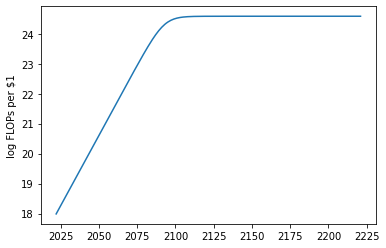

In [23]:
flops_per_dollar_ = np.array([flops_per_dollar(initial_flops_per_dollar=10 ** initial_flops_per_dollar_p[GRAPH_P],
                                               max_flops_per_dollar=10 ** max_flops_per_dollar_p[GRAPH_P],
                                               halving_rate=flops_halving_rate_p[GRAPH_P],
                                               year=(y - CURRENT_YEAR)) for y in years])
plt.plot(years, np.log10(flops_per_dollar_))
plt.ylabel('log FLOPs per $1')


In [24]:
for y in years:
    print('Year: {} - log {} FLOPs per $ (~{})'.format(y,
                                                       np.round(np.log10(flops_per_dollar_[y - CURRENT_YEAR]), 1),
                                                       numerize(np.log10(flops_per_dollar_[y - CURRENT_YEAR]))))

Year: 2022 - log 18.0 FLOPs per $ (~100 quadrillion)
Year: 2023 - log 18.1 FLOPs per $ (~one quintillion)
Year: 2024 - log 18.2 FLOPs per $ (~one quintillion)
Year: 2025 - log 18.3 FLOPs per $ (~one quintillion)
Year: 2026 - log 18.4 FLOPs per $ (~one quintillion)
Year: 2027 - log 18.5 FLOPs per $ (~one quintillion)
Year: 2028 - log 18.6 FLOPs per $ (~one quintillion)
Year: 2029 - log 18.6 FLOPs per $ (~one quintillion)
Year: 2030 - log 18.7 FLOPs per $ (~one quintillion)
Year: 2031 - log 18.8 FLOPs per $ (~one quintillion)
Year: 2032 - log 18.9 FLOPs per $ (~one quintillion)
Year: 2033 - log 19.0 FLOPs per $ (~10 quintillion)
Year: 2034 - log 19.1 FLOPs per $ (~10 quintillion)
Year: 2035 - log 19.2 FLOPs per $ (~10 quintillion)
Year: 2036 - log 19.3 FLOPs per $ (~10 quintillion)
Year: 2037 - log 19.4 FLOPs per $ (~10 quintillion)
Year: 2038 - log 19.5 FLOPs per $ (~10 quintillion)
Year: 2039 - log 19.6 FLOPs per $ (~10 quintillion)
Year: 2040 - log 19.7 FLOPs per $ (~10 quintillion)
Y

## Max Possible OOM Reduction in TAI FLOP Size

Text(0.5, 0, 'initial FLOP needed for TAI prior to any reduction')

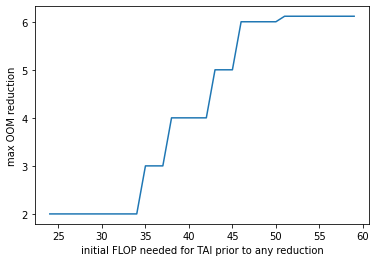

In [25]:
tai_sizes = range(24, 60)
flops_per_dollar_ = np.array([possible_algo_reduction_fn(min_reduction_p[GRAPH_P], max_reduction_p[GRAPH_P], t) for t in tai_sizes])
plt.plot(tai_sizes, flops_per_dollar_)
plt.ylabel('max OOM reduction')
plt.xlabel('initial FLOP needed for TAI prior to any reduction')


In [26]:
for t in tai_sizes:
    print('TAI log FLOP {} -> {} OOM reductions possible'.format(t,
                                                                 round(possible_algo_reduction_fn(min_reduction_p[GRAPH_P],
                                                                                                  max_reduction_p[GRAPH_P],
                                                                                                  t), 2)))
          

TAI log FLOP 24 -> 2.0 OOM reductions possible
TAI log FLOP 25 -> 2.0 OOM reductions possible
TAI log FLOP 26 -> 2.0 OOM reductions possible
TAI log FLOP 27 -> 2.0 OOM reductions possible
TAI log FLOP 28 -> 2.0 OOM reductions possible
TAI log FLOP 29 -> 2.0 OOM reductions possible
TAI log FLOP 30 -> 2.0 OOM reductions possible
TAI log FLOP 31 -> 2.0 OOM reductions possible
TAI log FLOP 32 -> 2.0 OOM reductions possible
TAI log FLOP 33 -> 2.0 OOM reductions possible
TAI log FLOP 34 -> 2.0 OOM reductions possible
TAI log FLOP 35 -> 3.0 OOM reductions possible
TAI log FLOP 36 -> 3.0 OOM reductions possible
TAI log FLOP 37 -> 3.0 OOM reductions possible
TAI log FLOP 38 -> 4.0 OOM reductions possible
TAI log FLOP 39 -> 4.0 OOM reductions possible
TAI log FLOP 40 -> 4.0 OOM reductions possible
TAI log FLOP 41 -> 4.0 OOM reductions possible
TAI log FLOP 42 -> 4.0 OOM reductions possible
TAI log FLOP 43 -> 5.0 OOM reductions possible
TAI log FLOP 44 -> 5.0 OOM reductions possible
TAI log FLOP 

## Halving time (years) of compute requirements

Text(0.5, 0, 'initial FLOP needed for TAI prior to any reduction')

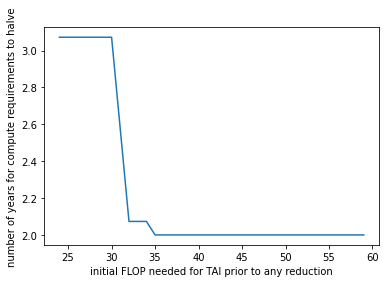

In [27]:
tai_sizes = range(24, 60)
flops_per_dollar_ = np.array([algo_halving_fn(algo_doubling_rate_min_p[GRAPH_P], algo_doubling_rate_max_p[GRAPH_P], t) for t in tai_sizes])
plt.plot(tai_sizes, flops_per_dollar_)
plt.ylabel('number of years for compute requirements to halve')
plt.xlabel('initial FLOP needed for TAI prior to any reduction')


In [28]:
for t in tai_sizes:
    print('TAI log FLOP {} -> algo doubling rate {}yrs'.format(t,
                                                               round(algo_halving_fn(algo_doubling_rate_min_p[GRAPH_P],
                                                                                     algo_doubling_rate_max_p[GRAPH_P],
                                                                                     t), 2)))


TAI log FLOP 24 -> algo doubling rate 3.07yrs
TAI log FLOP 25 -> algo doubling rate 3.07yrs
TAI log FLOP 26 -> algo doubling rate 3.07yrs
TAI log FLOP 27 -> algo doubling rate 3.07yrs
TAI log FLOP 28 -> algo doubling rate 3.07yrs
TAI log FLOP 29 -> algo doubling rate 3.07yrs
TAI log FLOP 30 -> algo doubling rate 3.07yrs
TAI log FLOP 31 -> algo doubling rate 2.57yrs
TAI log FLOP 32 -> algo doubling rate 2.07yrs
TAI log FLOP 33 -> algo doubling rate 2.07yrs
TAI log FLOP 34 -> algo doubling rate 2.07yrs
TAI log FLOP 35 -> algo doubling rate 2.0yrs
TAI log FLOP 36 -> algo doubling rate 2.0yrs
TAI log FLOP 37 -> algo doubling rate 2.0yrs
TAI log FLOP 38 -> algo doubling rate 2.0yrs
TAI log FLOP 39 -> algo doubling rate 2.0yrs
TAI log FLOP 40 -> algo doubling rate 2.0yrs
TAI log FLOP 41 -> algo doubling rate 2.0yrs
TAI log FLOP 42 -> algo doubling rate 2.0yrs
TAI log FLOP 43 -> algo doubling rate 2.0yrs
TAI log FLOP 44 -> algo doubling rate 2.0yrs
TAI log FLOP 45 -> algo doubling rate 2.0yrs

## Dollars Needed to Buy TAI (Given Algorithmic Progress and Decline in Cost per FLOP)

Text(0, 0.5, 'log $ needed to buy TAI')

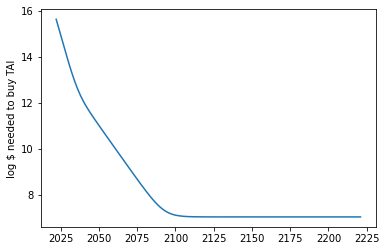

In [29]:
cost_of_tai_ = np.array([cost_of_tai(initial_flops=10 ** initial_flops_p[GRAPH_P],
                                     possible_reduction=10 ** possible_algo_reduction_fn(min_reduction_p[GRAPH_P], max_reduction_p[GRAPH_P], initial_flops_p[GRAPH_P]),
                                     algo_doubling_rate=algo_halving_fn(algo_doubling_rate_min_p[GRAPH_P],
                                                                        algo_doubling_rate_max_p[GRAPH_P],
                                                                        initial_flops_p[GRAPH_P]),
                                     initial_flops_per_dollar=10 ** initial_flops_per_dollar_p[GRAPH_P],
                                     max_flops_per_dollar=10 ** max_flops_per_dollar_p[GRAPH_P],
                                     flops_halving_rate=flops_halving_rate_p[GRAPH_P],
                                     year=(y - CURRENT_YEAR)) for y in years])

plt.plot(years, np.log10(cost_of_tai_))
plt.ylabel('log $ needed to buy TAI')


In [30]:
for y in years:
    print('Year: {} - log $ {} to buy TAI (~{})'.format(y,
                                                        np.round(np.log10(cost_of_tai_[y - CURRENT_YEAR]), 1),
                                                        numerize(np.log10(cost_of_tai_[y - CURRENT_YEAR]))))

Year: 2022 - log $ 15.6 to buy TAI (~one quadrillion)
Year: 2023 - log $ 15.4 to buy TAI (~one quadrillion)
Year: 2024 - log $ 15.2 to buy TAI (~one quadrillion)
Year: 2025 - log $ 14.9 to buy TAI (~100 trillion)
Year: 2026 - log $ 14.7 to buy TAI (~100 trillion)
Year: 2027 - log $ 14.4 to buy TAI (~100 trillion)
Year: 2028 - log $ 14.2 to buy TAI (~100 trillion)
Year: 2029 - log $ 14.0 to buy TAI (~10 trillion)
Year: 2030 - log $ 13.8 to buy TAI (~10 trillion)
Year: 2031 - log $ 13.6 to buy TAI (~10 trillion)
Year: 2032 - log $ 13.3 to buy TAI (~10 trillion)
Year: 2033 - log $ 13.1 to buy TAI (~10 trillion)
Year: 2034 - log $ 12.9 to buy TAI (~one trillion)
Year: 2035 - log $ 12.8 to buy TAI (~one trillion)
Year: 2036 - log $ 12.6 to buy TAI (~one trillion)
Year: 2037 - log $ 12.4 to buy TAI (~one trillion)
Year: 2038 - log $ 12.3 to buy TAI (~one trillion)
Year: 2039 - log $ 12.2 to buy TAI (~one trillion)
Year: 2040 - log $ 12.0 to buy TAI (~one trillion)
Year: 2041 - log $ 11.9 to 

## FLOPs at Max Spend

Text(0, 0.5, 'max log FLOPs bought given willingness to spend')

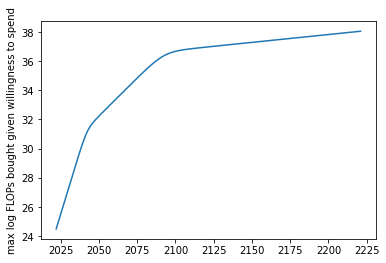

In [31]:
flops_at_max_ = np.array([flops_at_max(initial_gdp=initial_gdp,
                                       gdp_growth=gdp_growth_p[GRAPH_P],
                                       initial_pay=10 ** initial_pay_p[GRAPH_P],
                                       spend_doubling_time=spend_doubling_time_p[GRAPH_P],
                                       max_gdp_frac=max_gdp_frac_p[GRAPH_P],
                                       initial_flops_per_dollar=10 ** initial_flops_per_dollar_p[GRAPH_P],
                                       max_flops_per_dollar=10 ** max_flops_per_dollar_p[GRAPH_P],
                                       flops_halving_rate=flops_halving_rate_p[GRAPH_P],
                                       year=(y - CURRENT_YEAR)) for y in years])

plt.plot(years, np.log10(flops_at_max_))
plt.ylabel('max log FLOPs bought given willingness to spend')


In [32]:
for y in years:
    print('Year: {} - max log FLOPs {} (~{})'.format(y,
                                                     np.round(np.log10(flops_at_max_[y - CURRENT_YEAR]), 1),
                                                     numerize(np.log10(flops_at_max_[y - CURRENT_YEAR]))))

Year: 2022 - max log FLOPs 24.5 (~one septillion)
Year: 2023 - max log FLOPs 24.8 (~one septillion)
Year: 2024 - max log FLOPs 25.2 (~10 septillion)
Year: 2025 - max log FLOPs 25.5 (~10 septillion)
Year: 2026 - max log FLOPs 25.9 (~10 septillion)
Year: 2027 - max log FLOPs 26.2 (~100 septillion)
Year: 2028 - max log FLOPs 26.6 (~100 septillion)
Year: 2029 - max log FLOPs 26.9 (~100 septillion)
Year: 2030 - max log FLOPs 27.2 (~one octillion)
Year: 2031 - max log FLOPs 27.6 (~one octillion)
Year: 2032 - max log FLOPs 27.9 (~one octillion)
Year: 2033 - max log FLOPs 28.3 (~10 octillion)
Year: 2034 - max log FLOPs 28.6 (~10 octillion)
Year: 2035 - max log FLOPs 29.0 (~10 octillion)
Year: 2036 - max log FLOPs 29.3 (~100 octillion)
Year: 2037 - max log FLOPs 29.6 (~100 octillion)
Year: 2038 - max log FLOPs 30.0 (~100 octillion)
Year: 2039 - max log FLOPs 30.3 (~one nonillion)
Year: 2040 - max log FLOPs 30.6 (~one nonillion)
Year: 2041 - max log FLOPs 30.8 (~one nonillion)
Year: 2042 - max l

## Chance of Non-scaling Delay

Text(0, 0.5, 'chance of non-scaling delay by year')

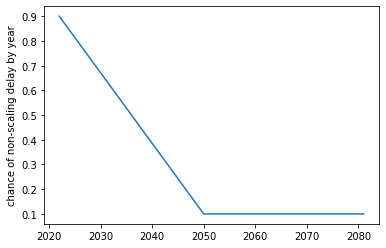

In [33]:
p_nonscaling_delay_ = np.array([p_nonscaling_delay(initial_chance_of_nonscaling_issue,
                                                   final_chance_of_nonscaling_issue,
                                                   year=y,
                                                   max_year=nonscaling_issue_bottom_year) for y in years])

plt.plot(years[:60], p_nonscaling_delay_[:60])
plt.ylabel('chance of non-scaling delay by year')
# TODO: Make logistic?

In [34]:
for y in years:
    print('Year: {} - p(nonscaling delay) = {}%'.format(y,
                                                        np.round(p_nonscaling_delay_[y - CURRENT_YEAR] * 100, 1)))

Year: 2022 - p(nonscaling delay) = 90.0%
Year: 2023 - p(nonscaling delay) = 87.1%
Year: 2024 - p(nonscaling delay) = 84.3%
Year: 2025 - p(nonscaling delay) = 81.4%
Year: 2026 - p(nonscaling delay) = 78.6%
Year: 2027 - p(nonscaling delay) = 75.7%
Year: 2028 - p(nonscaling delay) = 72.9%
Year: 2029 - p(nonscaling delay) = 70.0%
Year: 2030 - p(nonscaling delay) = 67.1%
Year: 2031 - p(nonscaling delay) = 64.3%
Year: 2032 - p(nonscaling delay) = 61.4%
Year: 2033 - p(nonscaling delay) = 58.6%
Year: 2034 - p(nonscaling delay) = 55.7%
Year: 2035 - p(nonscaling delay) = 52.9%
Year: 2036 - p(nonscaling delay) = 50.0%
Year: 2037 - p(nonscaling delay) = 47.1%
Year: 2038 - p(nonscaling delay) = 44.3%
Year: 2039 - p(nonscaling delay) = 41.4%
Year: 2040 - p(nonscaling delay) = 38.6%
Year: 2041 - p(nonscaling delay) = 35.7%
Year: 2042 - p(nonscaling delay) = 32.9%
Year: 2043 - p(nonscaling delay) = 30.0%
Year: 2044 - p(nonscaling delay) = 27.1%
Year: 2045 - p(nonscaling delay) = 24.3%
Year: 2046 - p(n

## Run Model

Running
## RUN 1/10000 ##
Diagnostic: tai_flop_size=36.68830383562707, nonscaling_delay=6.636521444117861, algo_doubling_rate=2.030635481596587, possible_algo_reduction=3.069756547181646, initial_flops_per_dollar=1.0325735915641408e+18, flops_halving_rate=2.3912351696779326, max_flops_per_dollar=2.4613024427463158e+25, initial_pay=5580313.2778563155, gdp_growth=1.0309454491689936, max_gdp_frac=8.63359544968192e-05, willingness_ramp=1, spend_doubling_time=0.7722293057023601
-
It takes 36.7 log FLOPs (~one thousand decillion) for transformative capabilities.
Every 2.0 years algorithms get 2x better, with 3.1 log reductions possible.
FLOPs start at a cost of 18.0 log FLOPs (~one quintillion) per 2022$USD. Every 2.4 years they get 2x cheaper, to a maximum of 25.4 log FLOPs (~10 septillion) per 2022$USD.
We are willing to pay 6.7 log 2022$USD (~one million) and this increases by 0.8x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.031x per year.
In this simulation, there are n

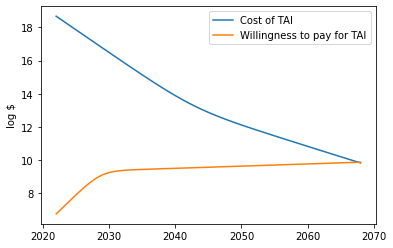

## RUN 2/10000 ##
Diagnostic: tai_flop_size=21.87750509960997, nonscaling_delay=7.982225778933585, algo_doubling_rate=2.444117991569521, possible_algo_reduction=1.2846495254256696, initial_flops_per_dollar=9.396238731052626e+17, flops_halving_rate=3.0247962339573093, max_flops_per_dollar=6.026895712122893e+24, initial_pay=5674178.385559531, gdp_growth=1.0302200714211427, max_gdp_frac=0.0022412060529742486, willingness_ramp=1, spend_doubling_time=0.8278311719728557
-
It takes 21.9 log FLOPs (~one sextillion) for transformative capabilities.
Every 2.4 years algorithms get 2x better, with 1.3 log reductions possible.
FLOPs start at a cost of 18.0 log FLOPs (~100 quadrillion) per 2022$USD. Every 3.0 years they get 2x cheaper, to a maximum of 24.8 log FLOPs (~one septillion) per 2022$USD.
We are willing to pay 6.8 log 2022$USD (~one million) and this increases by 0.8x per year to a max of 0.0022% of GDP. GDP grows at a rate of 1.03x per year.
In this simulation, there are no willingness ram

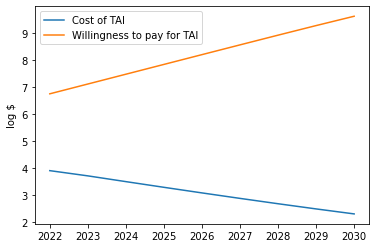

## RUN 3/10000 ##
Diagnostic: tai_flop_size=38.0808518697869, nonscaling_delay=1.1495478470340839, algo_doubling_rate=1.6619809206980622, possible_algo_reduction=3.4728194267471038, initial_flops_per_dollar=1.4254985164800988e+18, flops_halving_rate=3.848243539745806, max_flops_per_dollar=1.551341807581373e+22, initial_pay=2194546.861955496, gdp_growth=1.0263896380440678, max_gdp_frac=0.0003781538555490724, willingness_ramp=1, spend_doubling_time=1.4746194458335158
-
It takes 38.1 log FLOPs (~100 thousand decillion) for transformative capabilities.
Every 1.7 years algorithms get 2x better, with 3.5 log reductions possible.
FLOPs start at a cost of 18.2 log FLOPs (~one quintillion) per 2022$USD. Every 3.8 years they get 2x cheaper, to a maximum of 22.2 log FLOPs (~10 sextillion) per 2022$USD.
We are willing to pay 6.3 log 2022$USD (~one million) and this increases by 1.5x per year to a max of 0.0004% of GDP. GDP grows at a rate of 1.026x per year.
In this simulation, there are no willin

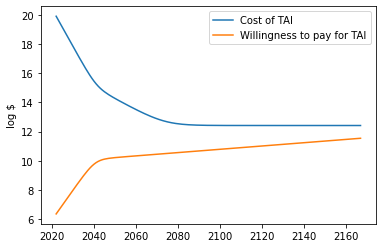

## RUN 4/10000 ##
Diagnostic: tai_flop_size=36.65159862433897, nonscaling_delay=5.536263275676562, algo_doubling_rate=1.3096709573318934, possible_algo_reduction=2.210680519145729, initial_flops_per_dollar=3.93819838914623e+17, flops_halving_rate=1.8505845934444958, max_flops_per_dollar=6.199389466607856e+26, initial_pay=28390873.723663364, gdp_growth=1.0260146407870345, max_gdp_frac=0.00019770032698324626, willingness_ramp=1, spend_doubling_time=1.0525879674677612
-
It takes 36.7 log FLOPs (~one thousand decillion) for transformative capabilities.
Every 1.3 years algorithms get 2x better, with 2.2 log reductions possible.
FLOPs start at a cost of 17.6 log FLOPs (~100 quadrillion) per 2022$USD. Every 1.9 years they get 2x cheaper, to a maximum of 26.8 log FLOPs (~100 septillion) per 2022$USD.
We are willing to pay 7.5 log 2022$USD (~10 million) and this increases by 1.1x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.026x per year.
In this simulation, there are no willin

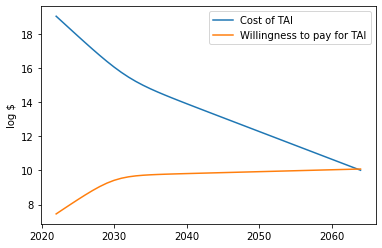

## RUN 5/10000 ##
Diagnostic: tai_flop_size=27.065052564868452, nonscaling_delay=9.371628763845, algo_doubling_rate=3.1063439084456728, possible_algo_reduction=1.4765742401779407, initial_flops_per_dollar=5.417656698492105e+17, flops_halving_rate=2.208487145341629, max_flops_per_dollar=6.562257830000168e+25, initial_pay=3540769.7347501107, gdp_growth=1.019578517026685, max_gdp_frac=6e-05, willingness_ramp=1, spend_doubling_time=1.1887684064826447
-
It takes 27.1 log FLOPs (~one octillion) for transformative capabilities.
Every 3.1 years algorithms get 2x better, with 1.5 log reductions possible.
FLOPs start at a cost of 17.7 log FLOPs (~100 quadrillion) per 2022$USD. Every 2.2 years they get 2x cheaper, to a maximum of 25.8 log FLOPs (~10 septillion) per 2022$USD.
We are willing to pay 6.5 log 2022$USD (~one million) and this increases by 1.2x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.02x per year.
In this simulation, there are no willingness ramp effects.
We are wi

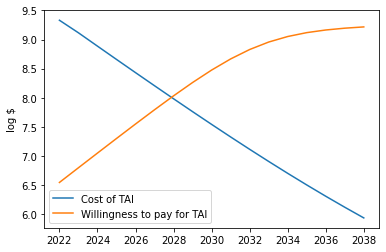

## RUN 6/10000 ##
Diagnostic: tai_flop_size=35.65626860531254, nonscaling_delay=3.003736395845547, algo_doubling_rate=2.5020154510536887, possible_algo_reduction=3.49429566813268, initial_flops_per_dollar=5.128800784020154e+17, flops_halving_rate=4.18271375578247, max_flops_per_dollar=8.759189582887372e+22, initial_pay=3539964.5214519654, gdp_growth=1.0199858548601508, max_gdp_frac=0.00024056092212450632, willingness_ramp=0.42600282251459726, spend_doubling_time=1.2237619425109785
-
It takes 35.7 log FLOPs (~100 decillion) for transformative capabilities.
Every 2.5 years algorithms get 2x better, with 3.5 log reductions possible.
FLOPs start at a cost of 17.7 log FLOPs (~100 quadrillion) per 2022$USD. Every 4.2 years they get 2x cheaper, to a maximum of 22.9 log FLOPs (~10 sextillion) per 2022$USD.
We are willing to pay 6.5 log 2022$USD (~one million) and this increases by 1.2x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.02x per year.
In this simulation, if we are 43.

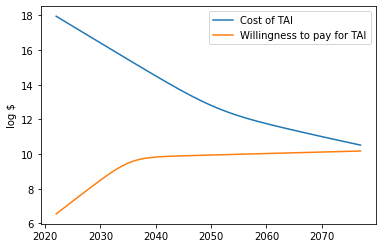

## RUN 7/10000 ##
Diagnostic: tai_flop_size=38.61034201918687, nonscaling_delay=6.338225195390782, algo_doubling_rate=2.2763640139566186, possible_algo_reduction=4.475710293147085, initial_flops_per_dollar=6.170449154864545e+17, flops_halving_rate=2.9045046153579475, max_flops_per_dollar=3.518506097502705e+22, initial_pay=26097558.420733616, gdp_growth=1.015923724103144, max_gdp_frac=0.00013457969738115384, willingness_ramp=1, spend_doubling_time=0.8471901435652957
-
It takes 38.6 log FLOPs (~100 thousand decillion) for transformative capabilities.
Every 2.3 years algorithms get 2x better, with 4.5 log reductions possible.
FLOPs start at a cost of 17.8 log FLOPs (~100 quadrillion) per 2022$USD. Every 2.9 years they get 2x cheaper, to a maximum of 22.5 log FLOPs (~10 sextillion) per 2022$USD.
We are willing to pay 7.4 log 2022$USD (~10 million) and this increases by 0.8x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.016x per year.
In this simulation, there are no willing

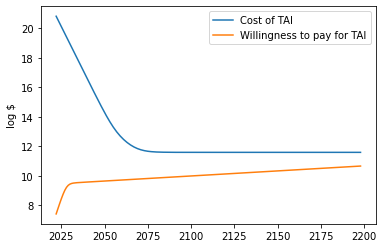

## RUN 8/10000 ##
Diagnostic: tai_flop_size=30.773685614898223, nonscaling_delay=5.004444732995152, algo_doubling_rate=3.292060355784594, possible_algo_reduction=2.4582230405934937, initial_flops_per_dollar=1.6670213305497723e+18, flops_halving_rate=4.645440757708434, max_flops_per_dollar=8.700002897781485e+23, initial_pay=8275841.129647179, gdp_growth=1.028683953986422, max_gdp_frac=0.0011577587569439815, willingness_ramp=1, spend_doubling_time=1.4674376636562794
-
It takes 30.8 log FLOPs (~one nonillion) for transformative capabilities.
Every 3.3 years algorithms get 2x better, with 2.5 log reductions possible.
FLOPs start at a cost of 18.2 log FLOPs (~one quintillion) per 2022$USD. Every 4.6 years they get 2x cheaper, to a maximum of 23.9 log FLOPs (~100 sextillion) per 2022$USD.
We are willing to pay 6.9 log 2022$USD (~one million) and this increases by 1.5x per year to a max of 0.0012% of GDP. GDP grows at a rate of 1.029x per year.
In this simulation, there are no willingness ram

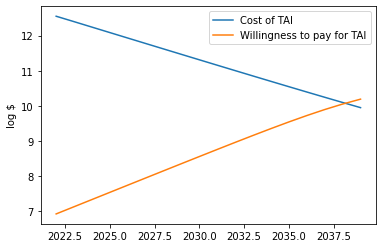

## RUN 9/10000 ##
Diagnostic: tai_flop_size=38.997803737982935, nonscaling_delay=10.153917130377028, algo_doubling_rate=2.246416050068901, possible_algo_reduction=2.941698781147098, initial_flops_per_dollar=2.426485558865262e+18, flops_halving_rate=4.390082557483409, max_flops_per_dollar=1.63448133507152e+26, initial_pay=1533231.484893942, gdp_growth=1.0249377620547477, max_gdp_frac=6e-05, willingness_ramp=1, spend_doubling_time=2.5885049336522887
-
It takes 39.0 log FLOPs (~100 thousand decillion) for transformative capabilities.
Every 2.2 years algorithms get 2x better, with 2.9 log reductions possible.
FLOPs start at a cost of 18.4 log FLOPs (~one quintillion) per 2022$USD. Every 4.4 years they get 2x cheaper, to a maximum of 26.2 log FLOPs (~100 septillion) per 2022$USD.
We are willing to pay 6.2 log 2022$USD (~one million) and this increases by 2.6x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.025x per year.
In this simulation, there are no willingness ramp effect

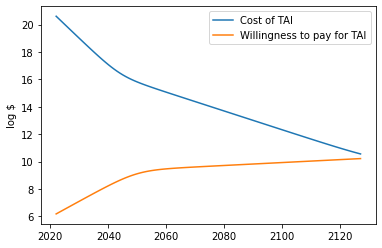

## RUN 10/10000 ##
Diagnostic: tai_flop_size=31.39079798981747, nonscaling_delay=5.524182593666128, algo_doubling_rate=2.7134206866401205, possible_algo_reduction=3.2528582639979424, initial_flops_per_dollar=5.3838708494319066e+17, flops_halving_rate=3.3885221138225305, max_flops_per_dollar=2.385800847540979e+27, initial_pay=3521268.6246442813, gdp_growth=1.0276872841365423, max_gdp_frac=0.0007959069954809506, willingness_ramp=1, spend_doubling_time=0.5
-
It takes 31.4 log FLOPs (~10 nonillion) for transformative capabilities.
Every 2.7 years algorithms get 2x better, with 3.3 log reductions possible.
FLOPs start at a cost of 17.7 log FLOPs (~100 quadrillion) per 2022$USD. Every 3.4 years they get 2x cheaper, to a maximum of 27.4 log FLOPs (~one octillion) per 2022$USD.
We are willing to pay 6.5 log 2022$USD (~one million) and this increases by 0.5x per year to a max of 0.0008% of GDP. GDP grows at a rate of 1.028x per year.
In this simulation, there are no willingness ramp effects.
We

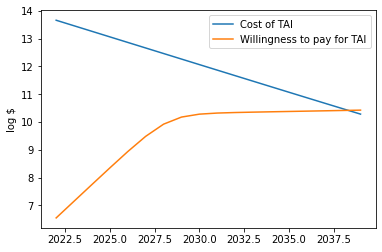

## RUN 11/10000 ##
Diagnostic: tai_flop_size=30.761884371086825, nonscaling_delay=10.692216549846046, algo_doubling_rate=3.56190135803572, possible_algo_reduction=1.8966111741498746, initial_flops_per_dollar=6.625040099661528e+17, flops_halving_rate=3.416349831564708, max_flops_per_dollar=1.689270173173728e+25, initial_pay=3118897.8577281763, gdp_growth=1.0335745600979236, max_gdp_frac=0.000662069957335211, willingness_ramp=1, spend_doubling_time=0.7221456807587237
-
It takes 30.8 log FLOPs (~one nonillion) for transformative capabilities.
Every 3.6 years algorithms get 2x better, with 1.9 log reductions possible.
FLOPs start at a cost of 17.8 log FLOPs (~100 quadrillion) per 2022$USD. Every 3.4 years they get 2x cheaper, to a maximum of 25.2 log FLOPs (~10 septillion) per 2022$USD.
We are willing to pay 6.5 log 2022$USD (~one million) and this increases by 0.7x per year to a max of 0.0007% of GDP. GDP grows at a rate of 1.034x per year.
In this simulation, there are no willingness ram

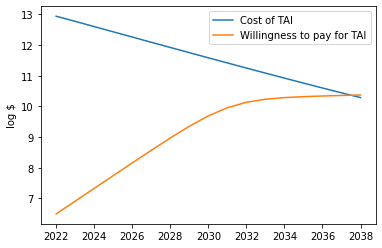

## RUN 12/10000 ##
Diagnostic: tai_flop_size=36.59816813641892, nonscaling_delay=4.2403428320000645, algo_doubling_rate=1.737972460137656, possible_algo_reduction=3.947305521765882, initial_flops_per_dollar=2.009013781592429e+17, flops_halving_rate=3.765097688731127, max_flops_per_dollar=9.130967342335526e+26, initial_pay=4508738.471228735, gdp_growth=1.0233786626997217, max_gdp_frac=0.00032234386153424325, willingness_ramp=0.6887928547440052, spend_doubling_time=1.6222328584409695
-
It takes 36.6 log FLOPs (~one thousand decillion) for transformative capabilities.
Every 1.7 years algorithms get 2x better, with 3.9 log reductions possible.
FLOPs start at a cost of 17.3 log FLOPs (~100 quadrillion) per 2022$USD. Every 3.8 years they get 2x cheaper, to a maximum of 27.0 log FLOPs (~100 septillion) per 2022$USD.
We are willing to pay 6.7 log 2022$USD (~one million) and this increases by 1.6x per year to a max of 0.0003% of GDP. GDP grows at a rate of 1.023x per year.
In this simulation, i

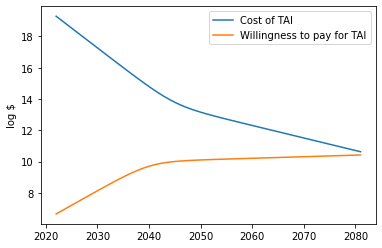

## RUN 13/10000 ##
Diagnostic: tai_flop_size=37.53875845160486, nonscaling_delay=6.556083085818953, algo_doubling_rate=1.4734559976582182, possible_algo_reduction=2.156277613404256, initial_flops_per_dollar=2.3215167227577774e+18, flops_halving_rate=4.184815023380534, max_flops_per_dollar=7.805358781514133e+25, initial_pay=2179875.4153149347, gdp_growth=1.0163428195237443, max_gdp_frac=0.00048155139893602905, willingness_ramp=1, spend_doubling_time=1.060580206557998
-
It takes 37.5 log FLOPs (~10 thousand decillion) for transformative capabilities.
Every 1.5 years algorithms get 2x better, with 2.2 log reductions possible.
FLOPs start at a cost of 18.4 log FLOPs (~one quintillion) per 2022$USD. Every 4.2 years they get 2x cheaper, to a maximum of 25.9 log FLOPs (~10 septillion) per 2022$USD.
We are willing to pay 6.3 log 2022$USD (~one million) and this increases by 1.1x per year to a max of 0.0005% of GDP. GDP grows at a rate of 1.016x per year.
In this simulation, there are no willin

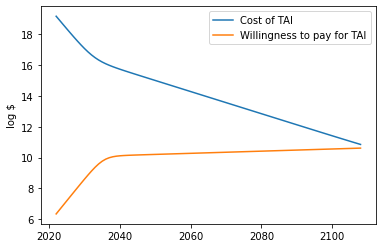

## RUN 14/10000 ##
Diagnostic: tai_flop_size=49.76847666531903, nonscaling_delay=16.14150242883994, algo_doubling_rate=2.0581333270169466, possible_algo_reduction=3.9567984849858897, initial_flops_per_dollar=7.638405919085402e+17, flops_halving_rate=4.670287705387061, max_flops_per_dollar=5.049244165374407e+25, initial_pay=5591744.015529139, gdp_growth=1.0293396791564284, max_gdp_frac=0.00016176870933374922, willingness_ramp=1, spend_doubling_time=1.7182269712259604
-
It takes 49.8 log FLOPs (~10 quadrillion decillion) for transformative capabilities.
Every 2.1 years algorithms get 2x better, with 4.0 log reductions possible.
FLOPs start at a cost of 17.9 log FLOPs (~100 quadrillion) per 2022$USD. Every 4.7 years they get 2x cheaper, to a maximum of 25.7 log FLOPs (~10 septillion) per 2022$USD.
We are willing to pay 6.7 log 2022$USD (~one million) and this increases by 1.7x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.029x per year.
In this simulation, there are no wil

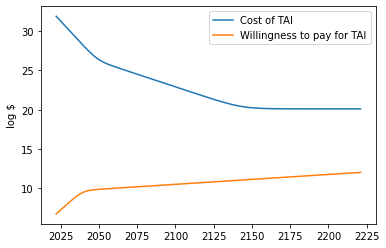

## RUN 15/10000 ##
Diagnostic: tai_flop_size=31.73614698216338, nonscaling_delay=3.7376915866329337, algo_doubling_rate=3.0155450839039233, possible_algo_reduction=0.3598961449373721, initial_flops_per_dollar=1.2619806365241946e+18, flops_halving_rate=3.085161519611685, max_flops_per_dollar=2.7308306430103936e+24, initial_pay=8813224.126456896, gdp_growth=1.027466449278699, max_gdp_frac=0.0001609994858386873, willingness_ramp=1, spend_doubling_time=2.1473801284041243
-
It takes 31.7 log FLOPs (~10 nonillion) for transformative capabilities.
Every 3.0 years algorithms get 2x better, with 0.4 log reductions possible.
FLOPs start at a cost of 18.1 log FLOPs (~one quintillion) per 2022$USD. Every 3.1 years they get 2x cheaper, to a maximum of 24.4 log FLOPs (~one septillion) per 2022$USD.
We are willing to pay 6.9 log 2022$USD (~one million) and this increases by 2.1x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.027x per year.
In this simulation, there are no willingness r

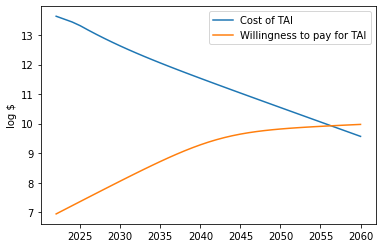

## RUN 16/10000 ##
Diagnostic: tai_flop_size=33.48749770933048, nonscaling_delay=5.685634568061033, algo_doubling_rate=2.1357614299276073, possible_algo_reduction=1.5938002038982073, initial_flops_per_dollar=1.3563092555530125e+18, flops_halving_rate=2.910903782988347, max_flops_per_dollar=2.0825896822785805e+24, initial_pay=1142593.1361072846, gdp_growth=1.0234124504157527, max_gdp_frac=0.0008788265569673525, willingness_ramp=1, spend_doubling_time=1.5262336992691021
-
It takes 33.5 log FLOPs (~one decillion) for transformative capabilities.
Every 2.1 years algorithms get 2x better, with 1.6 log reductions possible.
FLOPs start at a cost of 18.1 log FLOPs (~one quintillion) per 2022$USD. Every 2.9 years they get 2x cheaper, to a maximum of 24.3 log FLOPs (~one septillion) per 2022$USD.
We are willing to pay 6.1 log 2022$USD (~one million) and this increases by 1.5x per year to a max of 0.0009% of GDP. GDP grows at a rate of 1.023x per year.
In this simulation, there are no willingness

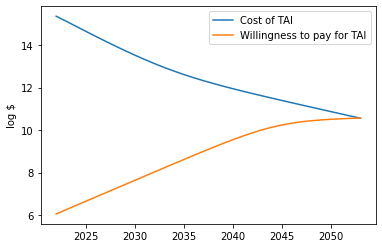

## RUN 17/10000 ##
Diagnostic: tai_flop_size=33.31309604159846, nonscaling_delay=9.219707363423694, algo_doubling_rate=2.229195403929245, possible_algo_reduction=2.475733249413331, initial_flops_per_dollar=2.494869950195787e+18, flops_halving_rate=2.896181878958922, max_flops_per_dollar=3.247380457888263e+26, initial_pay=2218866.211676142, gdp_growth=1.01829215582158, max_gdp_frac=0.0021833676462431765, willingness_ramp=1, spend_doubling_time=0.6495860080599885
-
It takes 33.3 log FLOPs (~one decillion) for transformative capabilities.
Every 2.2 years algorithms get 2x better, with 2.5 log reductions possible.
FLOPs start at a cost of 18.4 log FLOPs (~one quintillion) per 2022$USD. Every 2.9 years they get 2x cheaper, to a maximum of 26.5 log FLOPs (~100 septillion) per 2022$USD.
We are willing to pay 6.3 log 2022$USD (~one million) and this increases by 0.6x per year to a max of 0.0022% of GDP. GDP grows at a rate of 1.018x per year.
In this simulation, there are no willingness ramp e

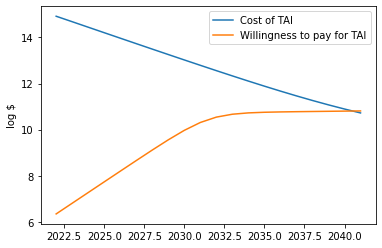

## RUN 18/10000 ##
Diagnostic: tai_flop_size=34.62570968975743, nonscaling_delay=9.671759452202947, algo_doubling_rate=1.4256738670741274, possible_algo_reduction=3.1133160133769304, initial_flops_per_dollar=5.629756706817816e+17, flops_halving_rate=2.35703382346324, max_flops_per_dollar=4.2487736235841255e+23, initial_pay=2098168.6629169113, gdp_growth=1.0283985701110607, max_gdp_frac=0.0001628513053983215, willingness_ramp=1, spend_doubling_time=1.033363312180401
-
It takes 34.6 log FLOPs (~10 decillion) for transformative capabilities.
Every 1.4 years algorithms get 2x better, with 3.1 log reductions possible.
FLOPs start at a cost of 17.8 log FLOPs (~100 quadrillion) per 2022$USD. Every 2.4 years they get 2x cheaper, to a maximum of 23.6 log FLOPs (~100 sextillion) per 2022$USD.
We are willing to pay 6.3 log 2022$USD (~one million) and this increases by 1.0x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.028x per year.
In this simulation, there are no willingness ram

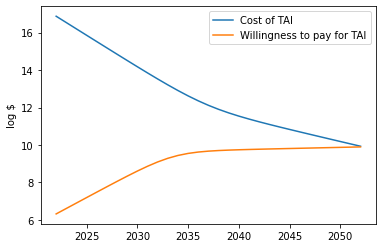

## RUN 19/10000 ##
Diagnostic: tai_flop_size=30.56804445254043, nonscaling_delay=2.187790782102815, algo_doubling_rate=2.369146819454353, possible_algo_reduction=2.004407363013686, initial_flops_per_dollar=5.0614252321428634e+17, flops_halving_rate=2.6178487308217746, max_flops_per_dollar=1.23171649290347e+25, initial_pay=3548341.1132846205, gdp_growth=1.035806298010826, max_gdp_frac=0.000706316232921396, willingness_ramp=1, spend_doubling_time=3.178908064210661
-
It takes 30.6 log FLOPs (~one nonillion) for transformative capabilities.
Every 2.4 years algorithms get 2x better, with 2.0 log reductions possible.
FLOPs start at a cost of 17.7 log FLOPs (~100 quadrillion) per 2022$USD. Every 2.6 years they get 2x cheaper, to a maximum of 25.1 log FLOPs (~10 septillion) per 2022$USD.
We are willing to pay 6.6 log 2022$USD (~one million) and this increases by 3.2x per year to a max of 0.0007% of GDP. GDP grows at a rate of 1.036x per year.
In this simulation, there are no willingness ramp e

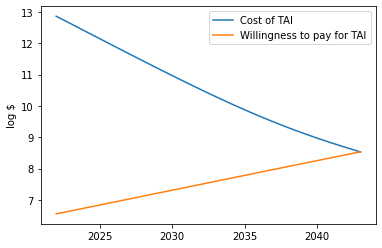

## RUN 20/10000 ##
Diagnostic: tai_flop_size=21.860989858432397, nonscaling_delay=4.71169919900836, algo_doubling_rate=2.7742562695303663, possible_algo_reduction=2.5874286465239855, initial_flops_per_dollar=6.476566907093203e+18, flops_halving_rate=3.86512676858372, max_flops_per_dollar=1.6145217284934638e+23, initial_pay=2592002.7718090024, gdp_growth=1.011535446060697, max_gdp_frac=0.00027237214363373674, willingness_ramp=1, spend_doubling_time=2.437283183971792
-
It takes 21.9 log FLOPs (~one sextillion) for transformative capabilities.
Every 2.8 years algorithms get 2x better, with 2.6 log reductions possible.
FLOPs start at a cost of 18.8 log FLOPs (~one quintillion) per 2022$USD. Every 3.9 years they get 2x cheaper, to a maximum of 23.2 log FLOPs (~100 sextillion) per 2022$USD.
We are willing to pay 6.4 log 2022$USD (~one million) and this increases by 2.4x per year to a max of 0.0003% of GDP. GDP grows at a rate of 1.012x per year.
In this simulation, there are no willingness r

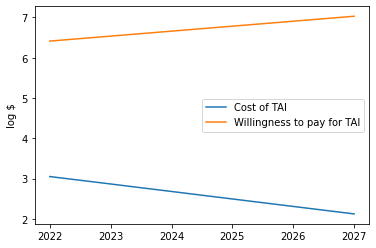

## RUN 21/10000 ##
Diagnostic: tai_flop_size=33.88394923301447, nonscaling_delay=6.274036237035679, algo_doubling_rate=1.6971458695204669, possible_algo_reduction=1.4928311770718166, initial_flops_per_dollar=4.807771289300981e+17, flops_halving_rate=2.2822634571184746, max_flops_per_dollar=2.107508960499165e+25, initial_pay=8504422.12855545, gdp_growth=1.031095161776351, max_gdp_frac=0.0016362723091381743, willingness_ramp=1, spend_doubling_time=0.8502662957274223
-
It takes 33.9 log FLOPs (~one decillion) for transformative capabilities.
Every 1.7 years algorithms get 2x better, with 1.5 log reductions possible.
FLOPs start at a cost of 17.7 log FLOPs (~100 quadrillion) per 2022$USD. Every 2.3 years they get 2x cheaper, to a maximum of 25.3 log FLOPs (~10 septillion) per 2022$USD.
We are willing to pay 6.9 log 2022$USD (~one million) and this increases by 0.9x per year to a max of 0.0016% of GDP. GDP grows at a rate of 1.031x per year.
In this simulation, there are no willingness ramp

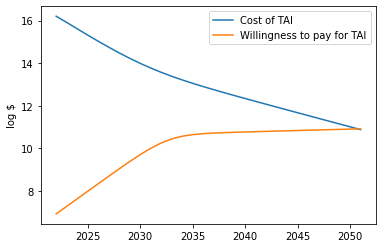

## RUN 22/10000 ##
Diagnostic: tai_flop_size=35.70632989308764, nonscaling_delay=3.1387023870695243, algo_doubling_rate=2.4214217315669635, possible_algo_reduction=2.5228218003924896, initial_flops_per_dollar=8.298653379690433e+17, flops_halving_rate=2.0221604306279546, max_flops_per_dollar=2.0838931057889297e+24, initial_pay=2076147.549730745, gdp_growth=1.0240832489425693, max_gdp_frac=0.0004477978077684433, willingness_ramp=1, spend_doubling_time=1.328791092879412
-
It takes 35.7 log FLOPs (~100 decillion) for transformative capabilities.
Every 2.4 years algorithms get 2x better, with 2.5 log reductions possible.
FLOPs start at a cost of 17.9 log FLOPs (~100 quadrillion) per 2022$USD. Every 2.0 years they get 2x cheaper, to a maximum of 24.3 log FLOPs (~one septillion) per 2022$USD.
We are willing to pay 6.3 log 2022$USD (~one million) and this increases by 1.3x per year to a max of 0.0004% of GDP. GDP grows at a rate of 1.024x per year.
In this simulation, there are no willingness 

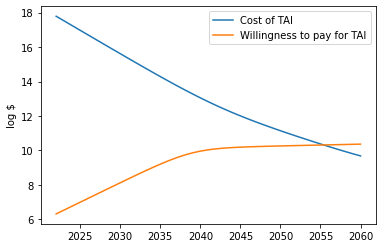

## RUN 23/10000 ##
Diagnostic: tai_flop_size=34.32069712306183, nonscaling_delay=10.764979923356197, algo_doubling_rate=2.080581479424825, possible_algo_reduction=2.1680884311939828, initial_flops_per_dollar=7.970626814345288e+17, flops_halving_rate=3.3755894710145826, max_flops_per_dollar=2.3089020953876203e+26, initial_pay=4856315.658998199, gdp_growth=1.0457674604611193, max_gdp_frac=0.0005019698324184083, willingness_ramp=1, spend_doubling_time=0.802584009708353
-
It takes 34.3 log FLOPs (~10 decillion) for transformative capabilities.
Every 2.1 years algorithms get 2x better, with 2.2 log reductions possible.
FLOPs start at a cost of 17.9 log FLOPs (~100 quadrillion) per 2022$USD. Every 3.4 years they get 2x cheaper, to a maximum of 26.4 log FLOPs (~100 septillion) per 2022$USD.
We are willing to pay 6.7 log 2022$USD (~one million) and this increases by 0.8x per year to a max of 0.0005% of GDP. GDP grows at a rate of 1.046x per year.
In this simulation, there are no willingness ra

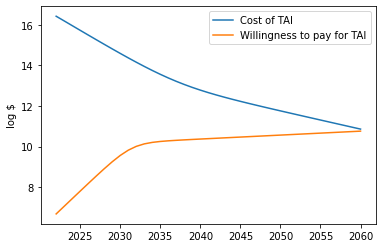

## RUN 24/10000 ##
Diagnostic: tai_flop_size=30.639764801762905, nonscaling_delay=1.3918511326135174, algo_doubling_rate=2.6265794601679175, possible_algo_reduction=1.9096821644589317, initial_flops_per_dollar=6.453264906708246e+17, flops_halving_rate=4.03128663771433, max_flops_per_dollar=5.370992214341517e+23, initial_pay=24315028.636168122, gdp_growth=1.023790587747062, max_gdp_frac=0.0006727792154248539, willingness_ramp=1, spend_doubling_time=2.5954507356731384
-
It takes 30.6 log FLOPs (~one nonillion) for transformative capabilities.
Every 2.6 years algorithms get 2x better, with 1.9 log reductions possible.
FLOPs start at a cost of 17.8 log FLOPs (~100 quadrillion) per 2022$USD. Every 4.0 years they get 2x cheaper, to a maximum of 23.7 log FLOPs (~100 sextillion) per 2022$USD.
We are willing to pay 7.4 log 2022$USD (~10 million) and this increases by 2.6x per year to a max of 0.0007% of GDP. GDP grows at a rate of 1.024x per year.
In this simulation, there are no willingness ra

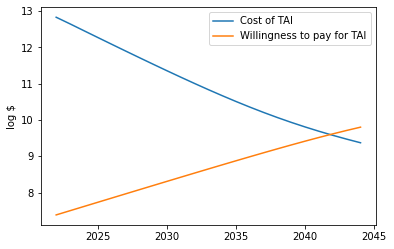

## RUN 25/10000 ##
Diagnostic: tai_flop_size=29.62848367530082, nonscaling_delay=5.18236221528123, algo_doubling_rate=2.8898922569429986, possible_algo_reduction=2.3785608613831077, initial_flops_per_dollar=3.901961670722781e+17, flops_halving_rate=2.6896701139480714, max_flops_per_dollar=5.410439200235026e+25, initial_pay=3313927.9246928436, gdp_growth=1.0217134757758433, max_gdp_frac=0.00011904171603305586, willingness_ramp=1, spend_doubling_time=1.3515584247747592
-
It takes 29.6 log FLOPs (~100 octillion) for transformative capabilities.
Every 2.9 years algorithms get 2x better, with 2.4 log reductions possible.
FLOPs start at a cost of 17.6 log FLOPs (~100 quadrillion) per 2022$USD. Every 2.7 years they get 2x cheaper, to a maximum of 25.7 log FLOPs (~10 septillion) per 2022$USD.
We are willing to pay 6.5 log 2022$USD (~one million) and this increases by 1.4x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.022x per year.
In this simulation, there are no willingness r

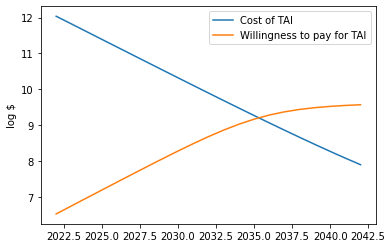

## RUN 26/10000 ##
Diagnostic: tai_flop_size=31.281458958764425, nonscaling_delay=6.143589497393659, algo_doubling_rate=2.982657449261958, possible_algo_reduction=1.838211281461688, initial_flops_per_dollar=1.2445838048451e+18, flops_halving_rate=3.420459333574057, max_flops_per_dollar=3.4912903082965614e+23, initial_pay=1463547.9381342053, gdp_growth=1.0221483794957822, max_gdp_frac=0.00021580769873625109, willingness_ramp=1, spend_doubling_time=1.6132600589212716
-
It takes 31.3 log FLOPs (~10 nonillion) for transformative capabilities.
Every 3.0 years algorithms get 2x better, with 1.8 log reductions possible.
FLOPs start at a cost of 18.1 log FLOPs (~one quintillion) per 2022$USD. Every 3.4 years they get 2x cheaper, to a maximum of 23.5 log FLOPs (~100 sextillion) per 2022$USD.
We are willing to pay 6.2 log 2022$USD (~one million) and this increases by 1.6x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.022x per year.
In this simulation, there are no willingness ram

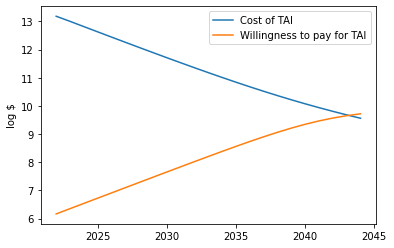

## RUN 27/10000 ##
Diagnostic: tai_flop_size=27.536179106016423, nonscaling_delay=2.6531701558474508, algo_doubling_rate=4.55576126206679, possible_algo_reduction=1.2144643022284396, initial_flops_per_dollar=1.0752249951787878e+18, flops_halving_rate=2.6617000990804347, max_flops_per_dollar=3.513783052673785e+24, initial_pay=1411124.4158455427, gdp_growth=1.0292088638127839, max_gdp_frac=0.00012031649071042583, willingness_ramp=1, spend_doubling_time=1.8584700521905047
-
It takes 27.5 log FLOPs (~one octillion) for transformative capabilities.
Every 4.6 years algorithms get 2x better, with 1.2 log reductions possible.
FLOPs start at a cost of 18.0 log FLOPs (~one quintillion) per 2022$USD. Every 2.7 years they get 2x cheaper, to a maximum of 24.5 log FLOPs (~one septillion) per 2022$USD.
We are willing to pay 6.1 log 2022$USD (~one million) and this increases by 1.9x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.029x per year.
In this simulation, there are no willingnes

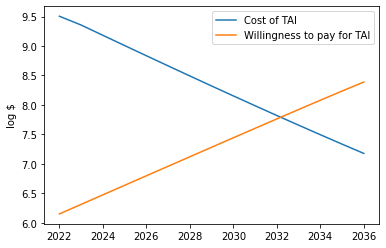

## RUN 28/10000 ##
Diagnostic: tai_flop_size=33.32251881373509, nonscaling_delay=9.133145668533011, algo_doubling_rate=3.0915278721577186, possible_algo_reduction=1.7628010304464532, initial_flops_per_dollar=4.1155693611834566e+17, flops_halving_rate=2.9892047827565102, max_flops_per_dollar=1.736237096897732e+24, initial_pay=3301488.7126506804, gdp_growth=1.0267973088036355, max_gdp_frac=0.0006154087286729289, willingness_ramp=1, spend_doubling_time=0.9803276296323661
-
It takes 33.3 log FLOPs (~one decillion) for transformative capabilities.
Every 3.1 years algorithms get 2x better, with 1.8 log reductions possible.
FLOPs start at a cost of 17.6 log FLOPs (~100 quadrillion) per 2022$USD. Every 3.0 years they get 2x cheaper, to a maximum of 24.2 log FLOPs (~one septillion) per 2022$USD.
We are willing to pay 6.5 log 2022$USD (~one million) and this increases by 1.0x per year to a max of 0.0006% of GDP. GDP grows at a rate of 1.027x per year.
In this simulation, there are no willingness

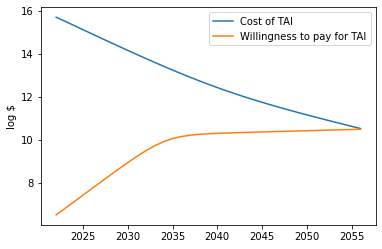

## RUN 29/10000 ##
Diagnostic: tai_flop_size=32.527571368018116, nonscaling_delay=7.580344713671571, algo_doubling_rate=1.3161664667437192, possible_algo_reduction=1.932974815263238, initial_flops_per_dollar=1.679342071603824e+18, flops_halving_rate=3.330324530137823, max_flops_per_dollar=7.061708650371589e+24, initial_pay=342844.0425753301, gdp_growth=1.0308110932657735, max_gdp_frac=0.0018881159156832405, willingness_ramp=1, spend_doubling_time=2.101331481553645
-
It takes 32.5 log FLOPs (~100 nonillion) for transformative capabilities.
Every 1.3 years algorithms get 2x better, with 1.9 log reductions possible.
FLOPs start at a cost of 18.2 log FLOPs (~one quintillion) per 2022$USD. Every 3.3 years they get 2x cheaper, to a maximum of 24.8 log FLOPs (~one septillion) per 2022$USD.
We are willing to pay 5.5 log 2022$USD (~100 thousand) and this increases by 2.1x per year to a max of 0.0019% of GDP. GDP grows at a rate of 1.031x per year.
In this simulation, there are no willingness ra

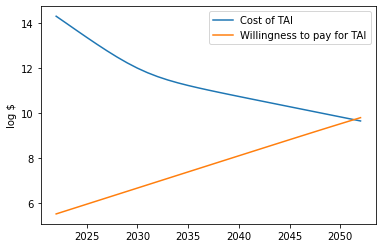

## RUN 30/10000 ##
Diagnostic: tai_flop_size=38.08004602088262, nonscaling_delay=13.854689107408264, algo_doubling_rate=2.990335398866903, possible_algo_reduction=4.179742032552586, initial_flops_per_dollar=1.0237605171054924e+18, flops_halving_rate=4.864964674742492, max_flops_per_dollar=3.65210185630478e+26, initial_pay=11668178.57257912, gdp_growth=1.014693501593214, max_gdp_frac=6e-05, willingness_ramp=0.4868515566111338, spend_doubling_time=0.6985396364210394
-
It takes 38.1 log FLOPs (~100 thousand decillion) for transformative capabilities.
Every 3.0 years algorithms get 2x better, with 4.2 log reductions possible.
FLOPs start at a cost of 18.0 log FLOPs (~one quintillion) per 2022$USD. Every 4.9 years they get 2x cheaper, to a maximum of 26.6 log FLOPs (~100 septillion) per 2022$USD.
We are willing to pay 7.1 log 2022$USD (~10 million) and this increases by 0.7x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.015x per year.
In this simulation, if we are 49.0% of t

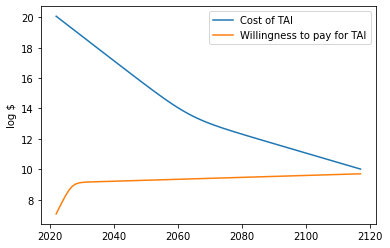

## RUN 201/10000 ##
## RUN 401/10000 ##
## RUN 601/10000 ##
## RUN 801/10000 ##
## RUN 1001/10000 ##
## RUN 1201/10000 ##
## RUN 1401/10000 ##
## RUN 1601/10000 ##
## RUN 1801/10000 ##
## RUN 2001/10000 ##
## RUN 2201/10000 ##
## RUN 2401/10000 ##
## RUN 2601/10000 ##
## RUN 2801/10000 ##
## RUN 3001/10000 ##
## RUN 3201/10000 ##
## RUN 3401/10000 ##
## RUN 3601/10000 ##
## RUN 3801/10000 ##
## RUN 4001/10000 ##
## RUN 4201/10000 ##
## RUN 4401/10000 ##
## RUN 4601/10000 ##
## RUN 4801/10000 ##
## RUN 5001/10000 ##
## RUN 5201/10000 ##
## RUN 5401/10000 ##
## RUN 5601/10000 ##
## RUN 5801/10000 ##
## RUN 6001/10000 ##
## RUN 6201/10000 ##
## RUN 6401/10000 ##
## RUN 6601/10000 ##
## RUN 6801/10000 ##
## RUN 7001/10000 ##
## RUN 7201/10000 ##
## RUN 7401/10000 ##
## RUN 7601/10000 ##
## RUN 7801/10000 ##
## RUN 8001/10000 ##
## RUN 8201/10000 ##
## RUN 8401/10000 ##
## RUN 8601/10000 ##
## RUN 8801/10000 ##
## RUN 9001/10000 ##
## RUN 9201/10000 ##
## RUN 9401/10000 ##
## RUN 9601/10000

In [35]:
tai_years = []
tai_flop_size_log_ = []
plt.ioff()
print('Running')

for r in range(RUNS):
    print_diagnostic = r < 30
    if print_diagnostic or r % 200 == 0 or r >= RUNS - 1:
        print('## RUN {}/{} ##'.format(r + 1, RUNS))
    if print_diagnostic:
        cost_of_tai_collector = []
        willingness_collector = []
    
    tai_flop_size_ = sample(tai_flop_size)
    if tai_flop_size_ > 300:
        tai_flop_size_ = int(tai_flop_size_) # Handle overflow errors
    tai_flop_size_log_.append(tai_flop_size_)
    
    algo_doubling_rate_ = algo_halving_fn(sample(algo_doubling_rate_min),
                                          sample(algo_doubling_rate_max),
                                          tai_flop_size_)
    
    possible_algo_reduction_ = possible_algo_reduction_fn(sample(min_reduction),
                                                          sample(max_reduction),
                                                          tai_flop_size_)
    initial_flops_per_dollar_ = 10 ** sample(initial_flops_per_dollar)
    flops_halving_rate_ = sample(flops_halving_rate)
    max_flops_per_dollar_ = 10 ** sample(max_flops_per_dollar)
    initial_pay_ = 10 ** sample(initial_pay)
    gdp_growth_ = sample(gdp_growth)
    max_gdp_frac_ = sample(max_gdp_frac)
    
    willingness_ramp_happens = event_occurs(p_willingness_ramp)
    if willingness_ramp_happens:
        willingness_ramp_ = sample(willingness_ramp)
    else:
        willingness_ramp_ = 1
        
    spend_doubling_time_ = sample(spend_doubling_time)
    nonscaling_delay_ = sample(nonscaling_delay)
    initial_chance_of_nonscaling_issue_ = initial_chance_of_nonscaling_issue
    final_chance_of_nonscaling_issue_ = final_chance_of_nonscaling_issue
    queue_tai_year = 99999
    
    if print_diagnostic:
        diagnostic = 'Diagnostic: tai_flop_size={}, nonscaling_delay={}, algo_doubling_rate={}, '
        diagnostic += 'possible_algo_reduction={}, initial_flops_per_dollar={}, flops_halving_rate={}, '
        diagnostic += 'max_flops_per_dollar={}, initial_pay={}, gdp_growth={}, max_gdp_frac={}, '
        diagnostic += 'willingness_ramp={}, spend_doubling_time={}'
        print(diagnostic.format(tai_flop_size_, nonscaling_delay_, algo_doubling_rate_,
                                possible_algo_reduction_, initial_flops_per_dollar_, flops_halving_rate_,
                                max_flops_per_dollar_, initial_pay_, gdp_growth_, max_gdp_frac_,
                                willingness_ramp_, spend_doubling_time_))
        print('-')

        print('It takes {} log FLOPs (~{}) for transformative capabilities.'.format(np.round(tai_flop_size_, 1),
                                                                                    numerize(tai_flop_size_)))
        print('Every {} years algorithms get 2x better, with {} log reductions possible.'.format(np.round(algo_doubling_rate_, 1),
                                                                                                 np.round(possible_algo_reduction_, 1)))
        print(('FLOPs start at a cost of {} log FLOPs (~{}) per 2022$USD. Every {} years they get ' +
               '2x cheaper, to a maximum of {} log FLOPs (~{}) per 2022$USD.').format(np.round(math.log10(initial_flops_per_dollar_), 1),
                                                                               numerize(math.log10(initial_flops_per_dollar_)),
                                                                               np.round(flops_halving_rate_, 1),
                                                                               np.round(math.log10(max_flops_per_dollar_), 1),
                                                                               numerize(math.log10(max_flops_per_dollar_))))
        print(('We are willing to pay {} log 2022$USD (~{}) and this increases by {}x per year to a max of {}% of GDP. ' +
               'GDP grows at a rate of {}x per year.').format(np.round(math.log10(initial_pay_), 1),
                                                              numerize(math.log10(initial_pay_)),
                                                              np.round(spend_doubling_time_, 1),
                                                              np.round(max_gdp_frac_, 4),
                                                              np.round(gdp_growth_, 3)))
        if willingness_ramp_ < 1:
            print('In this simulation, if we are {}% of the way to paying for TAI, we will ramp to paying for TAI.'.format(np.round(willingness_ramp_ * 100)))
        else:
            print('In this simulation, there are no willingness ramp effects.')
        print('We are willing to spend over {} years to make TAI'.format(willingness_spend_horizon))
            
        print(('If a non-scaling delay happens, it will take an additional {} years to produce TAI due' +
               ' to issues unrelated to scaling FLOP').format(np.round(nonscaling_delay_, 1)))
        print('---')
    
    tai_created = False
    is_nonscaling_issue = None
    for y in years:
        if not tai_created:
            flops_needed_ = flops_needed(initial_flops=10 ** tai_flop_size_,
                                         doubling_rate=algo_doubling_rate_,
                                         possible_reduction=10 ** possible_algo_reduction_,
                                         year=(y - CURRENT_YEAR))
            
            flops_per_dollar_ = flops_per_dollar(initial_flops_per_dollar=initial_flops_per_dollar_,
                                                 max_flops_per_dollar=max_flops_per_dollar_,
                                                 halving_rate=flops_halving_rate_,
                                                 year=(y - CURRENT_YEAR))
            
            if flops_per_dollar_ > 10 ** 200 or flops_needed_ > 10 ** 200:
                flops_needed_ = int(flops_needed_)
                flops_per_dollar_ = int(flops_per_dollar_)
                cost_of_tai_ = flops_needed_ // flops_per_dollar_
            else:
                cost_of_tai_ = flops_needed_ / flops_per_dollar_
            
            willingness_ = willingness_to_pay(initial_gdp=initial_gdp,
                                              gdp_growth=gdp_growth_,
                                              initial_pay=initial_pay_,
                                              spend_doubling_time=spend_doubling_time_,
                                              max_gdp_frac=max_gdp_frac_,
                                              year=(y - CURRENT_YEAR))
            
            if flops_per_dollar_ > 10 ** 200:
                willingness_ = int(willingness_)
            if willingness_ > 10 ** 200:
                flops_per_dollar_ = int(flops_per_dollar_)
            
            cost_of_tai_collector.append(cost_of_tai_)
            willingness_collector.append(willingness_)
            
            total_compute_ = willingness_ * flops_per_dollar_
            
            if print_diagnostic:
                out_str = ('Year: {} - {} max log FLOP ({}) available - TAI takes {} log FLOP ({}) - ' +
                           'log $ {} to buy TAI ({}) vs. willingness to pay log $ {} ({}) - {} log FLOPS per $ ({})')
                print(out_str.format(y,
                                     np.round(math.log10(total_compute_), 1),
                                     numerize(math.log10(total_compute_)),
                                     np.round(math.log10(flops_needed_), 1),
                                     numerize(math.log10(flops_needed_)),
                                     np.round(math.log10(cost_of_tai_), 1),
                                     numerize(math.log10(cost_of_tai_)),
                                     np.round(math.log10(willingness_), 1),
                                     numerize(math.log10(willingness_)),
                                     np.round(math.log10(flops_per_dollar_), 1),
                                     numerize(math.log10(flops_per_dollar_))))
            
            if cost_of_tai_ > 10 ** 200:
                spend_tai_years = int(cost_of_tai_) // int(willingness_)
            else:
                spend_tai_years = cost_of_tai_ / willingness_
                
            if queue_tai_year < 99999 and print_diagnostic:
                print('-$- {}/{}'.format(y, queue_tai_year))
            if (cost_of_tai_ * willingness_ramp_ <= willingness_) or y >= queue_tai_year:
                if is_nonscaling_issue is None:
                    p_nonscaling_delay_ = p_nonscaling_delay(initial_chance_of_nonscaling_issue,
                                                             final_chance_of_nonscaling_issue,
                                                             year=y,
                                                             max_year=nonscaling_issue_bottom_year)
                    r_ = random.random()
                    is_nonscaling_issue = r_ < p_nonscaling_delay_
                    nonscaling_countdown = nonscaling_delay_
                    if print_diagnostic:
                        print('-- {} p_nonscaling_issue={} r_={}'.format('Nonscaling delay occured' if is_nonscaling_issue else 'Nonscaling issue did not occur',
                                                                         np.round(p_nonscaling_delay_, 4),
                                                                         np.round(r_, 4)))
                
                if not is_nonscaling_issue or nonscaling_countdown <= 0.1:
                    if print_diagnostic:
                        print('--- /!\ TAI CREATED in {}'.format(y))
                        plot_tai(plt, years, cost_of_tai_collector, willingness_collector).show()
                    tai_years.append(y)
                    tai_created = True
                else:
                    if print_diagnostic:
                        print('/!\ FLOPs for TAI sufficient but needs {} more years to solve non-scaling issues'.format(np.round(nonscaling_countdown, 1)))
                    nonscaling_countdown -= 1
            elif willingness_spend_horizon > 1 and spend_tai_years <= willingness_spend_horizon and y + math.ceil(spend_tai_years) < queue_tai_year:
                queue_tai_year = y + math.ceil(spend_tai_years)
                if print_diagnostic:
                    print('-$- We have enough spend to make TAI in {} years (in {}) if sustained.'.format(math.ceil(spend_tai_years),
                                                                                                          queue_tai_year))
                
    if not tai_created:
        if print_diagnostic:
            print('--- :/ TAI NOT CREATED BEFORE {}'.format(MAX_YEAR + 1))
            plot_tai(plt, years, cost_of_tai_collector, willingness_collector).show()
        tai_years.append(MAX_YEAR + 1)


In [36]:
out = get_percentiles(tai_years)
[str(o[0]) + '%: ' + (str(int(o[1])) if o[1] < MAX_YEAR else '>' + str(MAX_YEAR)) for o in out.items()]

# NOTE: Ajeya's numbers should output something very close to:
# '5%': 2027,
# '10%: 2031',
# '20%: 2037',
# '30%: 2042',
# '40%: 2047',
# '50%: 2053',
# '60%: 2061',
# '70%: 2073',
# '80%: >2100',
# '90%: >2100',
# '95%: >2100'

# My latest numbers (2022 Aug 9 9:19AM CT):
# '1%: 2024',
# '5%: 2028',
# '10%: 2031',
# '20%: 2037',
# '30%: 2043',
# '40%: 2049',
# '50%: 2056',
# '60%: 2064',
# '70%: 2077',
# '80%: 2100',
# '90%: >2222',
# '95%: >2222',
# '99%: >2222']


['1%: 2025',
 '5%: 2029',
 '10%: 2032',
 '20%: 2038',
 '30%: 2043',
 '40%: 2049',
 '50%: 2055',
 '60%: 2063',
 '70%: 2076',
 '80%: 2099',
 '90%: >2222',
 '95%: >2222',
 '99%: >2222']

In [37]:
[str(o[0]) + '%: ' + (str(int(o[1]) - CURRENT_YEAR) if o[1] < MAX_YEAR else '>' + str(MAX_YEAR - CURRENT_YEAR)) + ' years from now' for o in out.items()]


['1%: 3 years from now',
 '5%: 7 years from now',
 '10%: 10 years from now',
 '20%: 16 years from now',
 '30%: 21 years from now',
 '40%: 27 years from now',
 '50%: 33 years from now',
 '60%: 41 years from now',
 '70%: 54 years from now',
 '80%: 77 years from now',
 '90%: >200 years from now',
 '95%: >200 years from now',
 '99%: >200 years from now']

In [38]:
def print_chance_tai_by_year(data, year_target):
    return '{}% chance of TAI by EOY {}'.format(int(np.round(sum([1 if y <= year_target else 0 for y in data]) / len(data) * 100, 0)),
                                                year_target)
    
print('## Within <1 years')
print_chance_tai_by_year(tai_years, 2022)


## Within <1 years


'0% chance of TAI by EOY 2022'

In [39]:
print('## Within <1 years')
print_chance_tai_by_year(tai_years, 2023)

## Within <1 years


'0% chance of TAI by EOY 2023'

In [40]:
print_chance_tai_by_year(tai_years, 2024)

'1% chance of TAI by EOY 2024'

In [41]:
print_chance_tai_by_year(tai_years, 2025)

'1% chance of TAI by EOY 2025'

In [42]:
print('## Within 5 years')
print_chance_tai_by_year(tai_years, 2027)

## Within 5 years


'3% chance of TAI by EOY 2027'

In [43]:
print_chance_tai_by_year(tai_years, 2029)

'6% chance of TAI by EOY 2029'

In [44]:
print_chance_tai_by_year(tai_years, 2030)

'7% chance of TAI by EOY 2030'

In [45]:
print('## Within 10 years')
print_chance_tai_by_year(tai_years, 2032)

## Within 10 years


'10% chance of TAI by EOY 2032'

In [46]:
# Holden benchmarks from https://www.cold-takes.com/biological-anchors-is-about-bounding-not-pinpointing-ai-timelines/#bio-anchors-as-a-way-of-bounding-ai-timelines
print('## Within 14 years (Holden benchmark - 10%-50%, Holden: 10%)')
print_chance_tai_by_year(tai_years, 2036)


## Within 14 years (Holden benchmark - 10%-50%, Holden: 10%)


'17% chance of TAI by EOY 2036'

In [47]:
print('## Within 15 years')
print_chance_tai_by_year(tai_years, 2037)

## Within 15 years


'19% chance of TAI by EOY 2037'

In [48]:
print_chance_tai_by_year(tai_years, 2040)

'25% chance of TAI by EOY 2040'

In [49]:
print('## Within 20 years')
print_chance_tai_by_year(tai_years, 2042)

## Within 20 years


'29% chance of TAI by EOY 2042'

In [50]:
print('## Within 25 years')
print_chance_tai_by_year(tai_years, 2047)

## Within 25 years


'38% chance of TAI by EOY 2047'

In [51]:
print_chance_tai_by_year(tai_years, 2050)

'43% chance of TAI by EOY 2050'

In [52]:
print_chance_tai_by_year(tai_years, 2060)

'57% chance of TAI by EOY 2060'

In [53]:
print('## Within 38 years (Holden benchmark - 25%-75%, Holden: 50%)')
print_chance_tai_by_year(tai_years, 2060)

## Within 38 years (Holden benchmark - 25%-75%, Holden: 50%)


'57% chance of TAI by EOY 2060'

In [54]:
print('## Within 48 years (Carlsmith benchmark - Carlsmith: 50%)')
print_chance_tai_by_year(tai_years, 2070)

## Within 48 years (Carlsmith benchmark - Carlsmith: 50%)


'66% chance of TAI by EOY 2070'

In [55]:
print('## Within 50 years')
print_chance_tai_by_year(tai_years, 2072)

## Within 50 years


'68% chance of TAI by EOY 2072'

In [56]:
print('## Within my personal expected lifespan')
print_chance_tai_by_year(tai_years, 2078)

## Within my personal expected lifespan


'72% chance of TAI by EOY 2078'

In [57]:
print('## Within 75 years')
print_chance_tai_by_year(tai_years, 2097)

## Within 75 years


'80% chance of TAI by EOY 2097'

In [58]:
print('## Within 78 years (Holden benchmark - 33%-90%, Holden: 66%)')
print_chance_tai_by_year(tai_years, 2100)

## Within 78 years (Holden benchmark - 33%-90%, Holden: 66%)


'80% chance of TAI by EOY 2100'

In [59]:
print('## Within 100 years')
print_chance_tai_by_year(tai_years, 2122)

## Within 100 years


'84% chance of TAI by EOY 2122'

In [60]:
print('## Within 200 years')
print_chance_tai_by_year(tai_years, 2222)

## Within 200 years


'89% chance of TAI by EOY 2222'

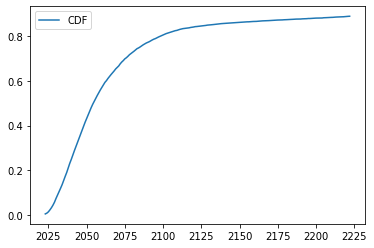

In [61]:
tai_years_ = np.array([MAX_YEAR + 1 if t > MAX_YEAR else t for t in tai_years])
count, bins_count = np.histogram(tai_years_, bins=(MAX_YEAR - CURRENT_YEAR))
pdf = count / sum(count)
cdf = np.cumsum(pdf)
bins = np.round(np.array([b for b in bins_count[1:] if b <= MAX_YEAR]))

plt.plot(bins, cdf[:len(bins)], label='CDF')
plt.legend()

<string>:265: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
<string>:266: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#d

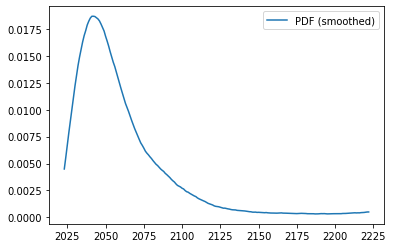

In [62]:
pdf_smoothed = savitzky_golay(pdf[:len(bins)], 51, 3) # window size 51, polynomial order 3
plt.plot(bins, pdf_smoothed, label='PDF (smoothed)')
plt.legend()
plt.show()

In [63]:
cdf[:len(bins)]

array([0.0046, 0.008 , 0.0138, 0.0224, 0.0321, 0.0435, 0.0568, 0.0736,
       0.0887, 0.1039, 0.1195, 0.1354, 0.1542, 0.1723, 0.1898, 0.2108,
       0.2309, 0.2485, 0.2681, 0.2869, 0.3052, 0.3234, 0.342 , 0.3602,
       0.3773, 0.3965, 0.4141, 0.4306, 0.4478, 0.4647, 0.4799, 0.4949,
       0.5084, 0.5219, 0.5346, 0.5474, 0.5592, 0.5706, 0.5819, 0.593 ,
       0.6008, 0.6107, 0.6194, 0.6279, 0.6359, 0.6439, 0.6528, 0.6596,
       0.6663, 0.676 , 0.6839, 0.6903, 0.698 , 0.703 , 0.7093, 0.7164,
       0.7216, 0.7271, 0.7322, 0.7381, 0.7437, 0.747 , 0.7513, 0.7563,
       0.7608, 0.7647, 0.7688, 0.7719, 0.7749, 0.7791, 0.7828, 0.7862,
       0.7887, 0.7923, 0.7957, 0.7988, 0.8015, 0.8046, 0.8084, 0.8109,
       0.813 , 0.8152, 0.8172, 0.8196, 0.8219, 0.8241, 0.8253, 0.8276,
       0.8299, 0.8316, 0.8332, 0.834 , 0.8352, 0.836 , 0.8368, 0.8384,
       0.8392, 0.8405, 0.8421, 0.8426, 0.8442, 0.8449, 0.8457, 0.8465,
       0.8476, 0.8489, 0.8493, 0.8501, 0.8507, 0.8515, 0.8524, 0.8532,
      

In [64]:
pdf[:len(bins)]

array([0.0046, 0.0034, 0.0058, 0.0086, 0.0097, 0.0114, 0.0133, 0.0168,
       0.0151, 0.0152, 0.0156, 0.0159, 0.0188, 0.0181, 0.0175, 0.021 ,
       0.0201, 0.0176, 0.0196, 0.0188, 0.0183, 0.0182, 0.0186, 0.0182,
       0.0171, 0.0192, 0.0176, 0.0165, 0.0172, 0.0169, 0.0152, 0.015 ,
       0.0135, 0.0135, 0.0127, 0.0128, 0.0118, 0.0114, 0.0113, 0.0111,
       0.0078, 0.0099, 0.0087, 0.0085, 0.008 , 0.008 , 0.0089, 0.0068,
       0.0067, 0.0097, 0.0079, 0.0064, 0.0077, 0.005 , 0.0063, 0.0071,
       0.0052, 0.0055, 0.0051, 0.0059, 0.0056, 0.0033, 0.0043, 0.005 ,
       0.0045, 0.0039, 0.0041, 0.0031, 0.003 , 0.0042, 0.0037, 0.0034,
       0.0025, 0.0036, 0.0034, 0.0031, 0.0027, 0.0031, 0.0038, 0.0025,
       0.0021, 0.0022, 0.002 , 0.0024, 0.0023, 0.0022, 0.0012, 0.0023,
       0.0023, 0.0017, 0.0016, 0.0008, 0.0012, 0.0008, 0.0008, 0.0016,
       0.0008, 0.0013, 0.0016, 0.0005, 0.0016, 0.0007, 0.0008, 0.0008,
       0.0011, 0.0013, 0.0004, 0.0008, 0.0006, 0.0008, 0.0009, 0.0008,
      

<string>:265: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
<string>:266: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#d

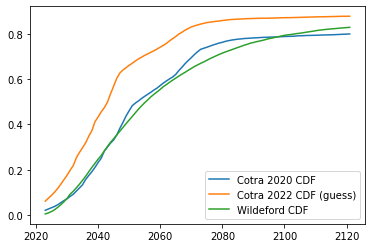

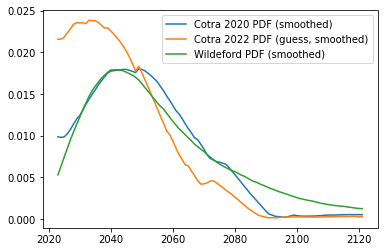

In [65]:
cotra_2020_cdf = [0.0214, 0.0272, 0.0328, 0.0385, 0.0458, 0.0551, 0.0641, 0.0721,
       0.0827, 0.0923, 0.1061, 0.1199, 0.1343, 0.1574, 0.175 , 0.1917,
       0.2108, 0.2321, 0.251 , 0.2825, 0.3001, 0.3177, 0.3317, 0.3531,
       0.3829, 0.4089, 0.4372, 0.4606, 0.4829, 0.4944, 0.504 , 0.5147,
       0.5243, 0.5335, 0.5423, 0.5521, 0.5608, 0.5719, 0.5826, 0.5922,
       0.6011, 0.6096, 0.6209, 0.6379, 0.6524, 0.6682, 0.682 , 0.6948,
       0.7084, 0.7207, 0.7314, 0.7362, 0.7407, 0.7456, 0.7506, 0.755 ,
       0.7594, 0.7626, 0.7668, 0.7698, 0.7725, 0.7745, 0.7765, 0.7775,
       0.7793, 0.7801, 0.781 , 0.7818, 0.7827, 0.7833, 0.7843, 0.7847,
       0.7852, 0.7858, 0.7861, 0.7868, 0.7874, 0.7882, 0.7887, 0.7891,
       0.7895, 0.7908, 0.7916, 0.7918, 0.7926, 0.7929, 0.7933, 0.7936,
       0.7941, 0.7949, 0.795 , 0.7954, 0.7957, 0.7962, 0.7969, 0.7976,
       0.7981, 0.7987, 0.7996, 0.8002, 0.8004, 0.801 , 0.8015, 0.8021,
       0.8025, 0.8029, 0.8034, 0.8041, 0.8045, 0.8052, 0.8059, 0.806 ,
       0.8066, 0.8071, 0.8079, 0.8087, 0.8089, 0.8093, 0.8093, 0.8095,
       0.8105, 0.8109, 0.8114, 0.8118, 0.8128, 0.8132, 0.8139, 0.8139,
       0.8144, 0.8149, 0.8154, 0.8162, 0.8167, 0.8173, 0.8177, 0.8185,
       0.8196, 0.82  , 0.821 , 0.8217, 0.8224, 0.8233, 0.8244, 0.8247,
       0.8254, 0.8262, 0.8267, 0.8274, 0.8277, 0.8288, 0.8294, 0.8298,
       0.8305, 0.8318, 0.8328, 0.8335, 0.8343, 0.8347, 0.8351, 0.8361,
       0.837 , 0.8376, 0.8385, 0.8398, 0.8404, 0.8413, 0.8419, 0.8427,
       0.8437, 0.8448, 0.8458, 0.8462, 0.8471, 0.8482, 0.8487, 0.8491,
       0.8498, 0.8505, 0.8507, 0.8511, 0.8519, 0.8526, 0.8534, 0.8542,
       0.855 , 0.8554, 0.8559, 0.8565, 0.857 , 0.8575, 0.8581, 0.8587,
       0.8592, 0.86  , 0.8605, 0.861 , 0.8615, 0.862 , 0.8629]
cotra_2020_pdf = np.append(np.array(cotra_2020_cdf[0]), np.diff(cotra_2020_cdf[:len(bins)]))
cotra_2020_pdf_smoothed = savitzky_golay(cotra_2020_pdf[:len(bins)], 51, 3)

cotra_2022_cdf = [0.0616, 0.0747, 0.0873, 0.1015, 0.118 , 0.1365, 0.1564, 0.1758,
       0.1981, 0.2188, 0.2531, 0.2768, 0.2975, 0.3193, 0.3481, 0.3728,
       0.4124, 0.433 , 0.4557, 0.4742, 0.4981, 0.5348, 0.569 , 0.6032,
       0.627 , 0.6404, 0.6507, 0.6611, 0.6701, 0.6801, 0.6893, 0.697 ,
       0.7051, 0.7115, 0.7186, 0.7252, 0.7331, 0.7411, 0.749 , 0.7577,
       0.7691, 0.7785, 0.7881, 0.799 , 0.807 , 0.8161, 0.8233, 0.8303,
       0.8348, 0.839 , 0.8429, 0.8462, 0.8494, 0.8517, 0.8532, 0.8553,
       0.8566, 0.8588, 0.8602, 0.862 , 0.8633, 0.864 , 0.8648, 0.8654,
       0.8662, 0.867 , 0.8672, 0.8677, 0.8683, 0.8686, 0.8689, 0.8689,
       0.8692, 0.8695, 0.8699, 0.8703, 0.8709, 0.8711, 0.8713, 0.8715,
       0.8719, 0.8721, 0.8727, 0.873 , 0.8736, 0.8739, 0.8742, 0.8746,
       0.875 , 0.8751, 0.8754, 0.8757, 0.8763, 0.8764, 0.8768, 0.8772,
       0.8775, 0.8775, 0.8776, 0.8779, 0.878 , 0.8781, 0.8783, 0.8789,
       0.8792, 0.8794, 0.8795, 0.8798, 0.8805, 0.8808, 0.8814, 0.8819,
       0.8822, 0.8826, 0.8827, 0.8828, 0.8832, 0.8834, 0.8837, 0.8839,
       0.8842, 0.8848, 0.8857, 0.8859, 0.8861, 0.8863, 0.8866, 0.8869,
       0.8869, 0.8873, 0.8878, 0.8889, 0.8896, 0.8904, 0.8906, 0.8911,
       0.8915, 0.892 , 0.8929, 0.8934, 0.8937, 0.8942, 0.8946, 0.8954,
       0.8959, 0.8963, 0.8969, 0.8972, 0.8975, 0.8984, 0.8988, 0.8993,
       0.8999, 0.9004, 0.9007, 0.9015, 0.9019, 0.9021, 0.9026, 0.9031,
       0.9037, 0.9041, 0.9048, 0.9054, 0.9057, 0.9062, 0.9067, 0.9075,
       0.9084, 0.9088, 0.909 , 0.9101, 0.9106, 0.9108, 0.9114, 0.9116,
       0.9121, 0.9127, 0.913 , 0.9137, 0.9144, 0.9147, 0.9154, 0.9159,
       0.9161, 0.9166, 0.9173, 0.9177, 0.9185, 0.9189, 0.9193, 0.9195,
       0.9195, 0.9198, 0.9204, 0.9205, 0.921 , 0.9216, 0.9221]
cotra_2022_pdf = np.append(np.array(cotra_2022_cdf[0]), np.diff(cotra_2022_cdf[:len(bins)]))
cotra_2022_pdf_smoothed = savitzky_golay(cotra_2022_pdf[:len(bins)], 51, 3)

peter_cdf = [0.0054, 0.0097, 0.0159, 0.024 , 0.0344, 0.0458, 0.0592, 0.0736,
       0.0926, 0.1056, 0.1205, 0.1365, 0.1537, 0.1715, 0.1914, 0.2107,
       0.2285, 0.2469, 0.2631, 0.2829, 0.3023, 0.3214, 0.337 , 0.3539,
       0.3703, 0.3868, 0.4035, 0.4195, 0.4354, 0.4516, 0.4676, 0.4822,
       0.4962, 0.5087, 0.5221, 0.5333, 0.5439, 0.5547, 0.5669, 0.5761,
       0.5862, 0.5954, 0.6045, 0.6133, 0.6223, 0.6301, 0.6389, 0.6472,
       0.6556, 0.6626, 0.6696, 0.676 , 0.6831, 0.6904, 0.6966, 0.703 ,
       0.7092, 0.7149, 0.72  , 0.725 , 0.7299, 0.7349, 0.7398, 0.7446,
       0.7496, 0.7537, 0.7587, 0.7617, 0.7653, 0.7682, 0.7713, 0.775 ,
       0.7786, 0.7811, 0.7844, 0.7872, 0.7905, 0.7932, 0.7954, 0.7968,
       0.799 , 0.8012, 0.8026, 0.8048, 0.8071, 0.8091, 0.8112, 0.8135,
       0.8158, 0.8173, 0.8188, 0.8204, 0.8216, 0.8228, 0.824 , 0.8254,
       0.8264, 0.8275, 0.8287, 0.8302, 0.8319, 0.8329, 0.8341, 0.8354,
       0.8364, 0.837 , 0.8378, 0.8385, 0.8395, 0.8407, 0.8421, 0.8425,
       0.8433, 0.8441, 0.8449, 0.8454, 0.8459, 0.8465, 0.8471, 0.8477,
       0.848 , 0.8483, 0.849 , 0.8493, 0.8499, 0.8504, 0.8509, 0.8522,
       0.8527, 0.8534, 0.854 , 0.8543, 0.8547, 0.8548, 0.8551, 0.8558,
       0.8562, 0.8563, 0.8564, 0.8571, 0.8579, 0.8583, 0.8584, 0.8588,
       0.8593, 0.8597, 0.8598, 0.8602, 0.8603, 0.8606, 0.8609, 0.8612,
       0.8615, 0.8615, 0.8618, 0.8622, 0.8623, 0.8627, 0.8632, 0.8636,
       0.8642, 0.8646, 0.8649, 0.865 , 0.8654, 0.8658, 0.8662, 0.8663,
       0.8664, 0.8669, 0.8671, 0.8672, 0.8677, 0.868 , 0.8684, 0.8685,
       0.8687, 0.8689, 0.8695, 0.8696, 0.8701, 0.8705, 0.8711, 0.8714,
       0.8724, 0.8726, 0.8731, 0.8736, 0.8744, 0.8748, 0.8753, 0.8756,
       0.876 , 0.8768, 0.8769, 0.8775, 0.8781, 0.8783, 0.8785]
peter_pdf = np.append(np.array(peter_cdf[0]), np.diff(peter_cdf[:len(bins)]))
peter_pdf_smoothed = savitzky_golay(peter_pdf[:len(bins)], 51, 3)

plt.plot(bins[:99], cotra_2020_cdf[:99], label='Cotra 2020 CDF')
plt.plot(bins[:99], cotra_2022_cdf[:99], label='Cotra 2022 CDF (guess)')
plt.plot(bins[:99], peter_cdf[:99], label='Wildeford CDF')
plt.legend()
plt.show()

plt.plot(bins[:99], cotra_2020_pdf_smoothed[:99], label='Cotra 2020 PDF (smoothed)')
plt.plot(bins[:99], cotra_2022_pdf_smoothed[:99], label='Cotra 2022 PDF (guess, smoothed)')
plt.plot(bins[:99], peter_pdf_smoothed[:99], label='Wildeford PDF (smoothed)')
plt.legend()
plt.show()